<a href="https://www.kaggle.com/code/bhatnagardaksh/gradient-descent-from-scratch?scriptVersionId=206064008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:white;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Gradient Descent Implementation
    
</h2>
</div>
    
</center>

An optimization approach called gradient descent is frequently used to train neural networks and machine learning models.  These models gain knowledge over time by using training data, and the cost function in gradient descent especially serves as a barometer by assessing the accuracy of each iteration of parameter changes. The model will keep changing its parameters to provide the minimal error until the function is close to or equal to zero. 


<div style="text-align: center; border-radius: 5px; padding: 10px;">
    <img src="https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png" alt="Descriptive Image Text" style="width: 90%; height: auto; border-radius: 5px;">
    <h3 style="color: white; font-size: 110%; letter-spacing: 0.5px;">How does gradient descent work?</h3>
</div>


Before diving into gradient descent, let’s review linear regression basics. You may remember the equation of a line,  $y = mx + b$ , where  $m$  is the slope and  b  the y-intercept. In linear regression, we fit a line to minimize errors between actual outputs and predictions  $\hat{y}$ , often using mean squared error.

> Gradient descent operates similarly, but in a convex cost function. Starting from an initial point, we calculate the derivative to determine slope steepness, using it to update the weights and bias. The steep slope at the start gradually flattens as we approach the curve’s lowest point, or convergence.

Just as in finding the best-fit line, gradient descent aims to minimize the cost function—the gap between predicted and actual values. This process relies on two key factors: direction and learning rate, which guide partial derivative calculations through each iteration, leading closer to a local or global minimum.


- **Learning Rate** (or alpha) defines the size of steps toward the minimum. Usually small, it adjusts based on the cost function’s behavior. Higher learning rates take larger steps but risk overshooting, while lower rates improve precision at the cost of longer, more computation-intensive iterations.

- The **cost function** measures the error between actual and predicted values, guiding model adjustments to reduce error. The model iterates along the negative gradient, progressively minimizing this function until learning concludes. The term “loss function” often refers to a single example’s error, while “cost function” typically represents the average error across the dataset, providing a broader performance view.



<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Types of Gradient Descent
    
</h3>
</div>
    
</center>


There exist three prominent variants of gradient descent learning algorithms: batch gradient descent, stochastic gradient descent, and mini-batch gradient descent.

- **Batch Gradient Descent**
  In batch gradient descent, errors for all training data points are summed, and the model updates after evaluating the entire set in a training epoch. Though computationally efficient, this approach can be memory-intensive and slow with large datasets. Batch gradient descent produces a stable error gradient and convergence but may settle in a local minimum rather than the global one.

- **Stochastic Gradient Descent**
  In stochastic gradient descent (SGD), each training example is used to update the model parameters individually, requiring less memory. While more frequent updates provide detailed insights and speed, they can reduce computational efficiency compared to batch gradient descent. The resulting noisy gradients help escape local minima, potentially leading to a global minimum.

- **Mini-Batch Gradient Descent**
  Mini-batch gradient descent amalgamates elements of both batch and stochastic gradient descent. It segments the training dataset into small batches and updates the model using each of these batches. This approach harmonizes the computational efficiency of batch gradient descent with the velocity of stochastic gradient descent, striking a favorable balance between the two.

These gradient descent variations offer distinct trade-offs in terms of computational efficiency, convergence behavior, and their ability to navigate local and global minima during the optimization process.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Challenges with gradient descent.
    
</h3>
</div>
    
</center>


While gradient descent remains a prevalent optimization technique, it confronts several challenges that warrant consideration. Some of these challenges encompass:

- **Navigating Local Minima and Saddle Points**
In convex problems, gradient descent effectively finds the global minimum, optimizing model performance. In nonconvex problems, however, multiple minima complicate this process. A near-zero cost function slope suggests halted learning, yet this may occur at local minima or saddle points rather than the global minimum. Local minima resemble the global minimum with ascending slopes on both sides, whereas saddle points have a negative gradient on one side, like a saddle’s shape. Introducing noisy gradients can help escape these local minima and saddle points, allowing gradient descent to navigate complex optimization landscapes.

This interplay between optimization challenges and the potential remedies, exemplified by noisy gradients, underscores the nuanced nature of gradient descent's optimization journey.

- **Vanishing and Exploding Gradients**
In the realm of deeper neural networks, particularly recurrent neural networks, gradient descent and backpropagation can introduce two additional challenges during model training.

    - **Vanishing Gradients**: This predicament arises when the gradient becomes exceedingly minute. As we backtrack during the backpropagation process, the gradient steadily diminishes, causing earlier layers in the network to acquire knowledge at a lethargic pace compared to later layers. This phenomenon translates into weight parameters being updated incrementally until they dwindle to insignificance—essentially approaching 0. Consequently, the algorithm enters a state of stagnation, ceasing to learn effectively.

    - **Exploding Gradients**: Conversely, this scenario emerges when the gradient swells to an unwieldy magnitude, engendering model instability. The repercussions include the inflation of model weights to colossal proportions, often spiraling into the realm of NaN (Not-a-Number) representation. A potential resolution to this quandary involves harnessing a dimensionality reduction technique. Such an approach aids in curtailing model intricacies, ameliorating the risk of gradients spiraling out of control.

The dual challenge of vanishing and exploding gradients in neural networks underscores the intricate balance that must be struck during model optimization. Overcoming these challenges contributes to the robustness and effectiveness of the neural network's learning dynamics.


Speaking of Neural Network, I also have implemented a rudimentary level of Neural Network from Scratch which you can check out by clicking [here](https://bit.ly/gradientdescent1)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100
import sqlite3
from sklearn.metrics import r2_score, roc_curve, auc
from urllib.request import urlretrieve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Gradient Descent for Regression
    
</h2>
</div>
    
</center>

### Loading the data

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
#storing the data into a dataframe
medical_df = pd.read_csv(medical_charges_url)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Checking the shape of the dataframe
medical_df.shape

(1338, 7)

In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Exploratory Data Analysis
    
</h2>
</div>
    
</center>

In [6]:
# Creating a sqlite3 database to run some SQL Queries 
conn = sqlite3.connect('database.db' )
# Write the DataFrame to a table in the database
medical_df.to_sql('data', conn, if_exists='replace', index=False)

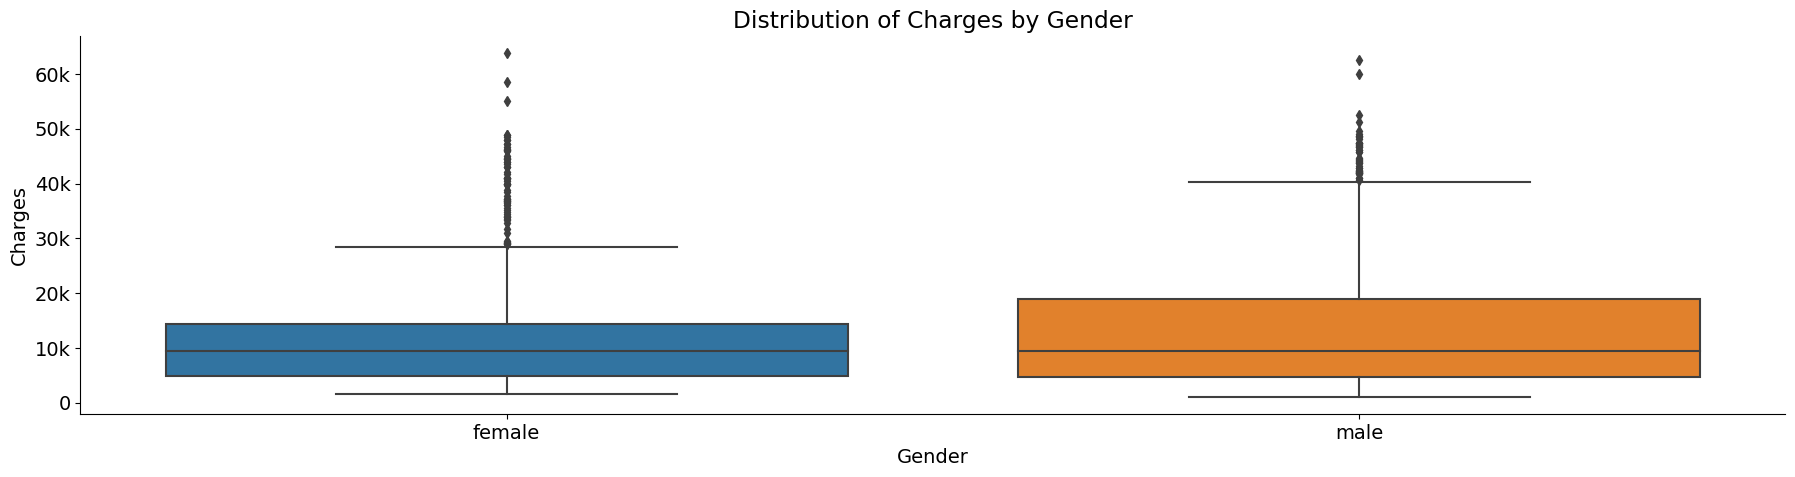

In [7]:
sns.boxplot(data=medical_df, x='sex', y='charges')
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Distribution of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> From the plot above, we could see males are likely to spend more on insurance charges..

</div>

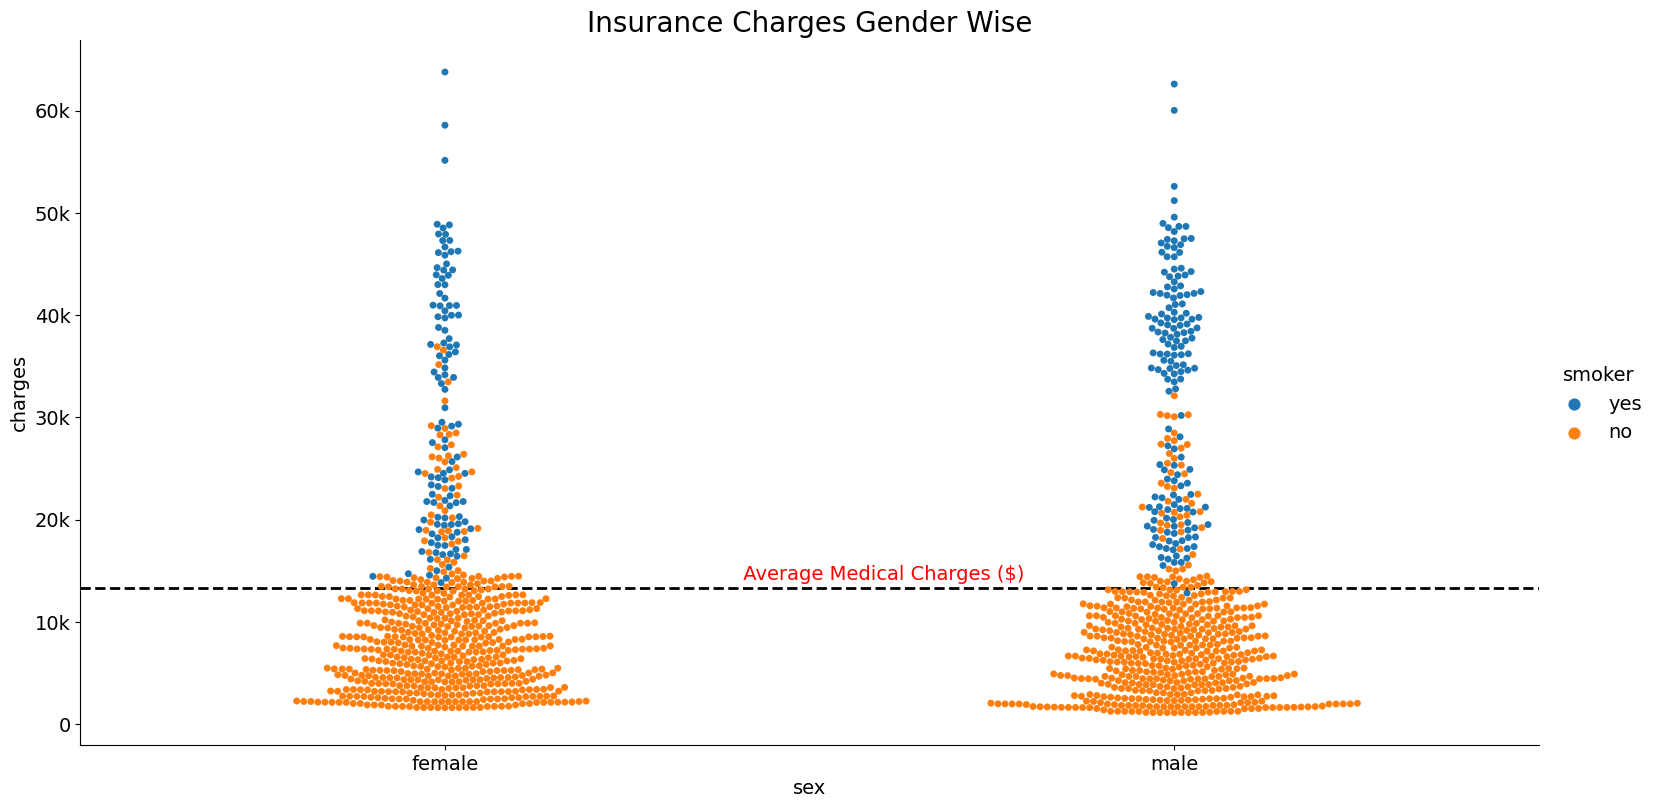

In [8]:
sns.catplot(data=medical_df,x= 'sex',y='charges', kind='swarm', hue='smoker', aspect =2, height=8)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f' Average Medical Charges ($)', (.4, medical_df['charges'].mean()+900), fontsize=14,color='red')
plt.title('Insurance Charges Gender Wise', fontsize=20)
plt.show()

<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> From the plot above, we could see male smokers are likely to spend more on insurance charges..

</div>

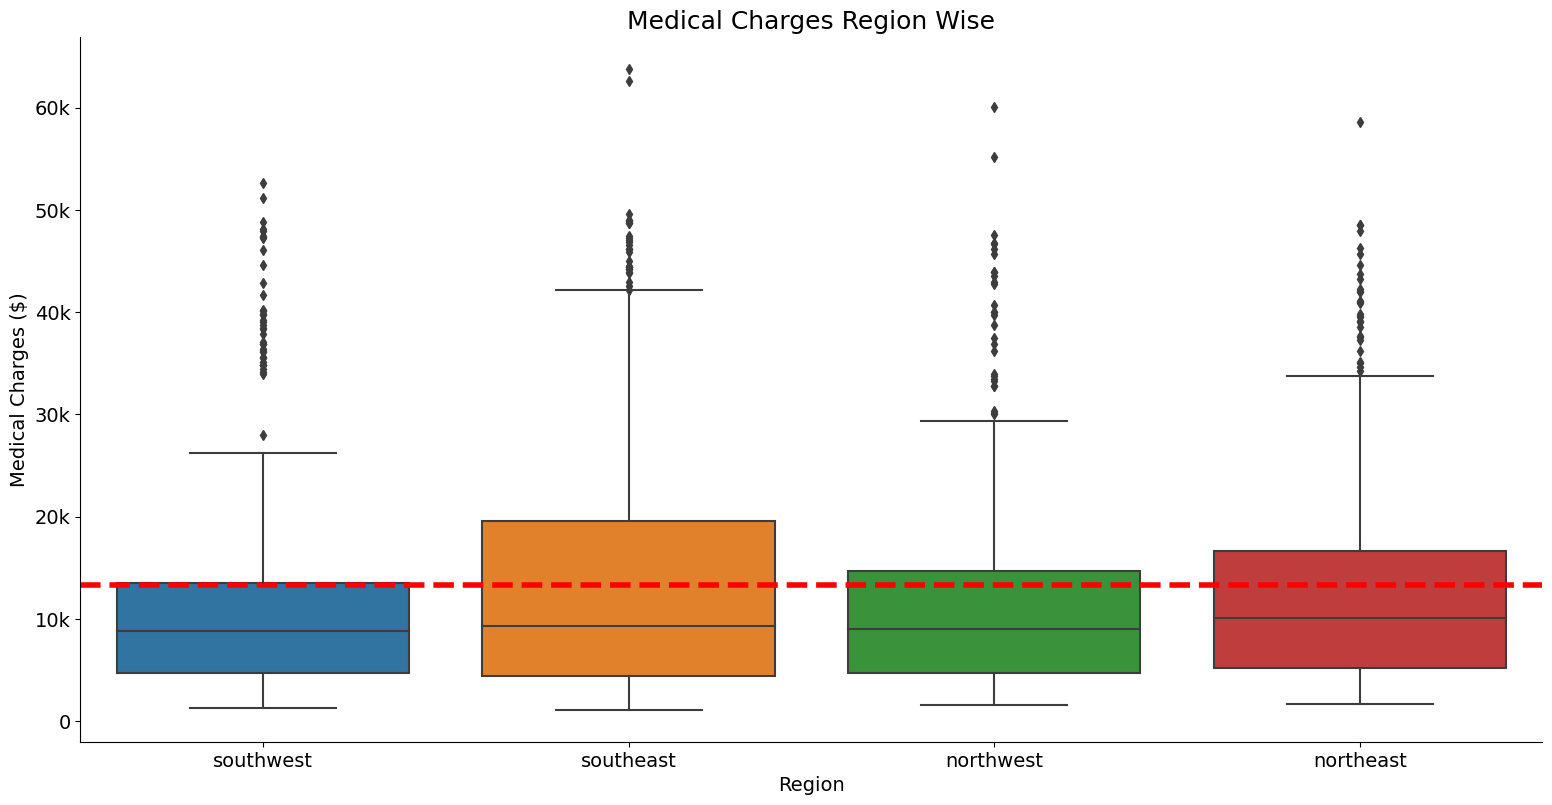

In [9]:
sns.catplot(data=medical_df,x= 'region',y='charges', kind='box', aspect =2, height=8)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=4, zorder=1, color='red')
plt.title('Medical Charges Region Wise', fontsize=18)
plt.xlabel('Region')
plt.ylabel('Medical Charges ($)')
plt.show()





<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> The range of insurance charges incurred by the people from the southeast region is the maximum as compared to the people in northeast and southeast.

</div>

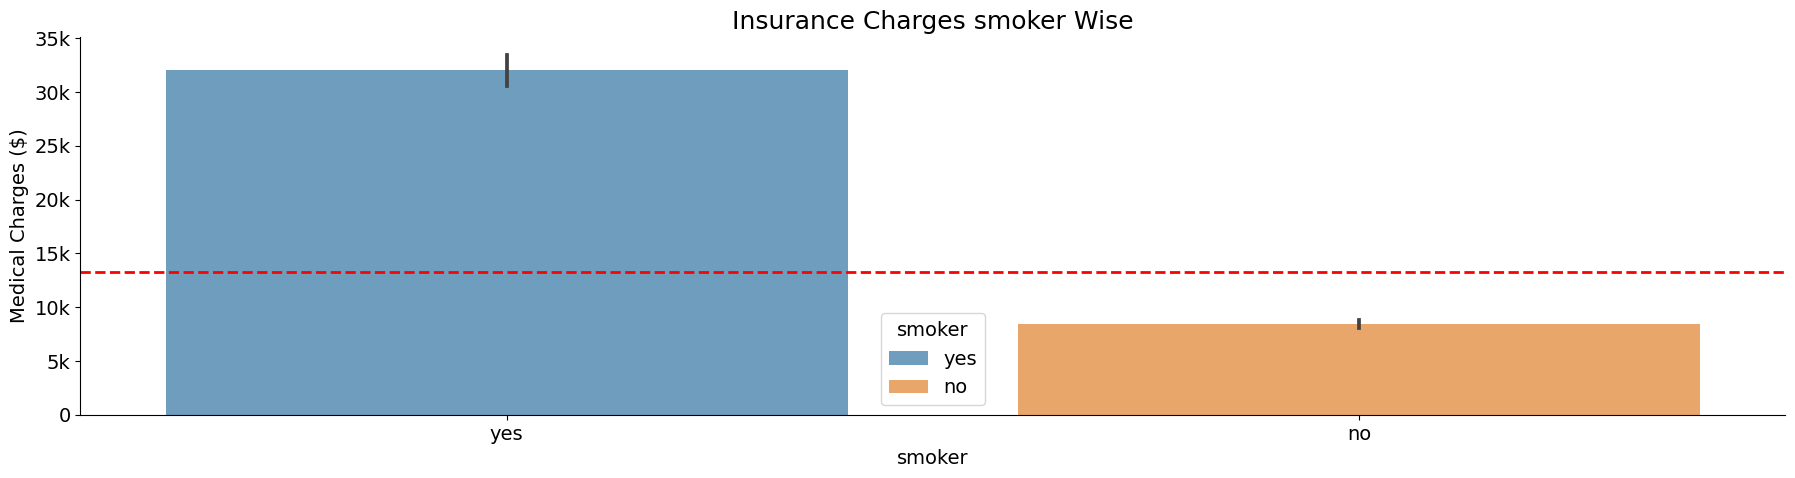

In [10]:
sns.barplot(data=medical_df,x= 'smoker',y='charges', hue='smoker', alpha=0.7, dodge=False)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='red')
plt.title('Insurance Charges smoker Wise', fontsize=18)
plt.ylabel('Medical Charges ($)')
plt.show()



<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> Smokers end up paying more insurance charges than the ones who don't smoke.
</div>

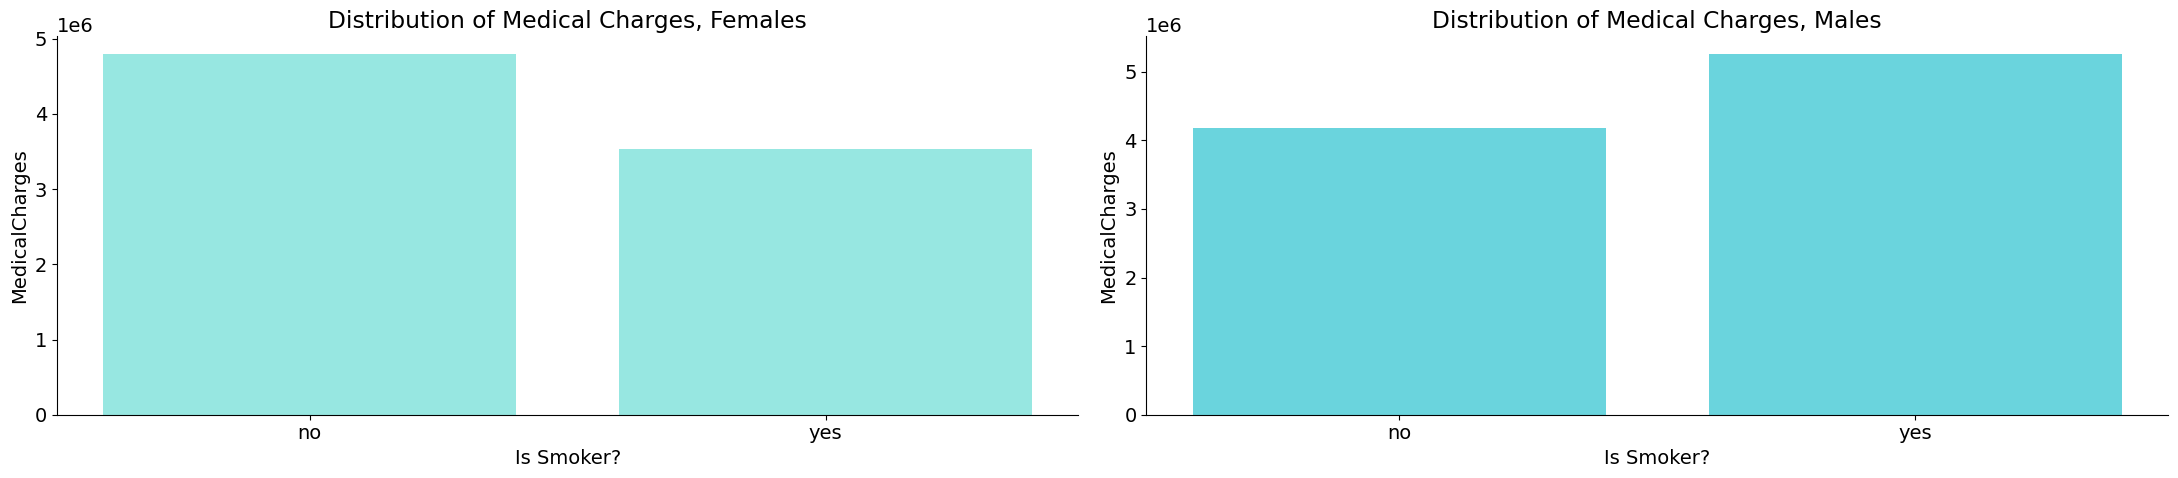

In [11]:
query = '''

select sex, smoker, round(sum(charges),2) as MedicalCharges 
from data 
group by sex, smoker

'''

temp = pd.read_sql(query, conn)
female_df = temp[temp['sex']=='female']
male_df = temp[temp['sex']=='male']
# Create the first subplot on the left
plt.subplot(1, 2, 1)
plt.bar(x=female_df['smoker'], height=female_df['MedicalCharges'], color='#97E7E1')
plt.xlabel('Is Smoker?')
plt.ylabel('MedicalCharges')
plt.title('Distribution of Medical Charges, Females')

# Turn off top and right spines for the first subplot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Create the second subplot on the right
plt.subplot(1, 2, 2)
plt.bar(x=male_df['smoker'], height=male_df['MedicalCharges'], color='#6AD4DD')
plt.xlabel('Is Smoker?')
plt.ylabel('MedicalCharges')
plt.title('Distribution of Medical Charges, Males')

# Turn off top and right spines for the second subplot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> Females who don't smoke pay higher charges while males who smoke pay more charges
</div>

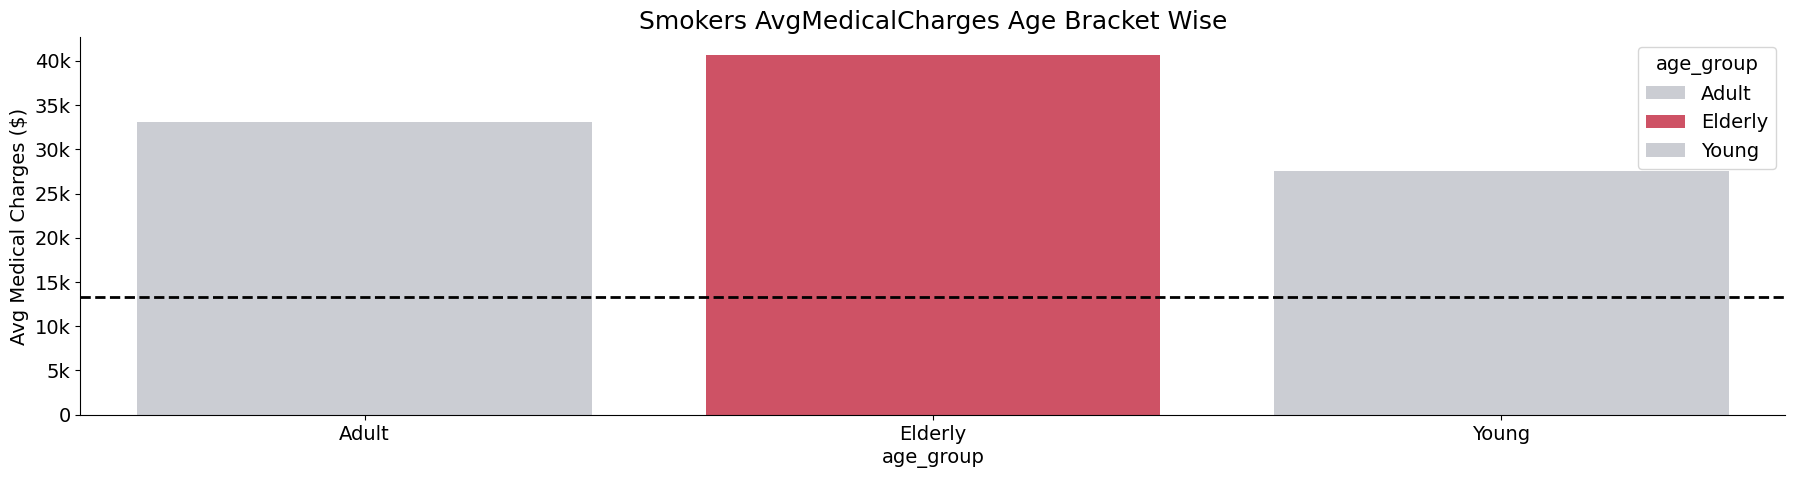

In [12]:
query = '''
SELECT 
    CASE
        WHEN age < 30 THEN 'Young'
        WHEN age < 60 THEN 'Adult'
        ELSE 'Elderly'
    END AS age_group,
    ROUND(AVG(charges), 2) AS AvgMedicalCharges
FROM 
    data
where smoker='yes'
GROUP BY 
    CASE
        WHEN age < 30 THEN 'Young'
        WHEN age < 60 THEN 'Adult'
        ELSE 'Elderly'
    END;

'''

temp = pd.read_sql(query, conn)
custom_palette = ['#C9CCD5', '#E23E57', '#C9CCD5']

sns.barplot(data=temp,x= 'age_group',y='AvgMedicalCharges', hue='age_group', dodge=False, palette=custom_palette)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.title('Smokers AvgMedicalCharges Age Bracket Wise', fontsize=18)
plt.ylabel('Avg Medical Charges ($)')
plt.show()

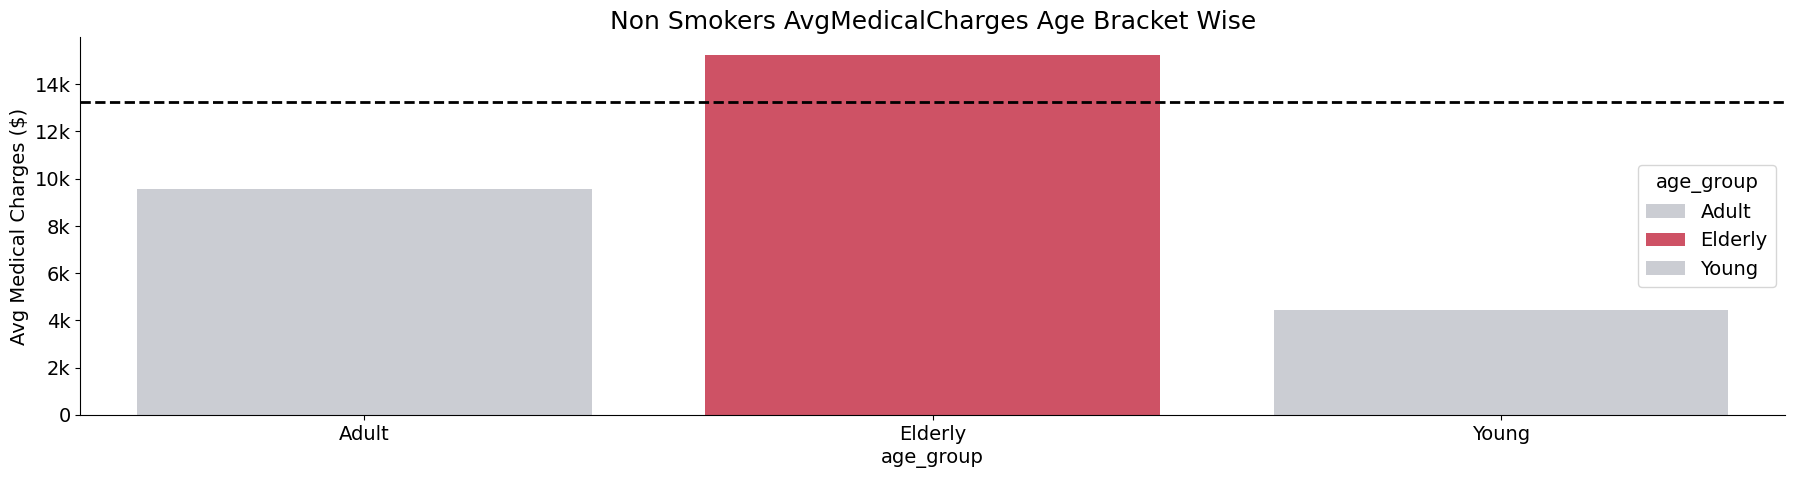

In [13]:
query = '''
SELECT 
    CASE
        WHEN age < 30 THEN 'Young'
        WHEN age < 60 THEN 'Adult'
        ELSE 'Elderly'
    END AS age_group,
    ROUND(AVG(charges), 2) AS AvgMedicalCharges
FROM 
    data
where smoker='no'
GROUP BY 
    CASE
        WHEN age < 30 THEN 'Young'
        WHEN age < 60 THEN 'Adult'
        ELSE 'Elderly'
    END;

'''

temp = pd.read_sql(query, conn)

sns.barplot(data=temp,x= 'age_group',y='AvgMedicalCharges', hue='age_group', dodge=False,palette=custom_palette )
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.title('Non Smokers AvgMedicalCharges Age Bracket Wise', fontsize=18)
plt.ylabel('Avg Medical Charges ($)')
plt.show()



<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> Adult and Young Folks who smoke spend more on insurance charges as compared to their counterparts who don't
</div>

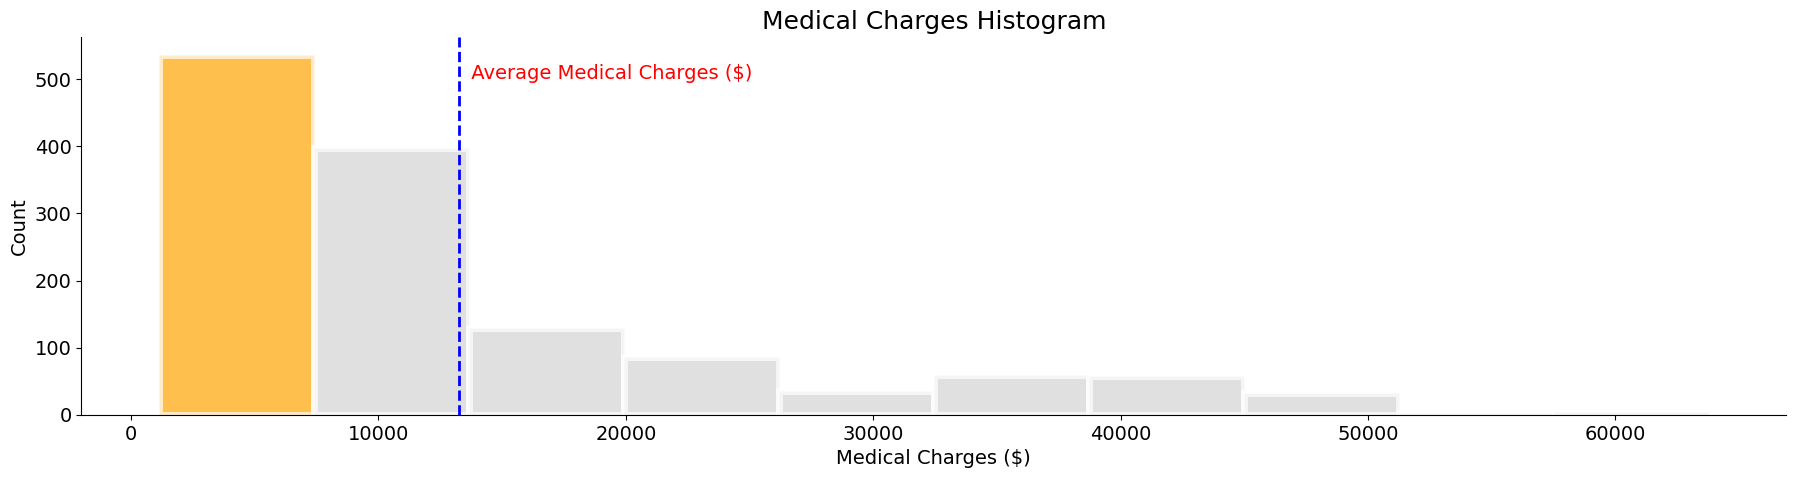

In [14]:
fig, ax = plt.subplots()
N, bins, patches = ax.hist(np.array(medical_df.charges), edgecolor='white', color='lightgray',linewidth=5, alpha=0.7)
for i in range(0,1):
    patches[i].set_facecolor('orange')
    plt.title('Medical Charges Histogram', fontsize=18)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Medical Charges ($)')
    plt.ylabel('Count')
    plt.axvline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='blue')
    plt.annotate(f' Average Medical Charges ($)', (13500, 500), fontsize=14,color='red')
    plt.show()

<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> Most of the people pay insurance charges within the range of 0 to 7k USD.
</div>

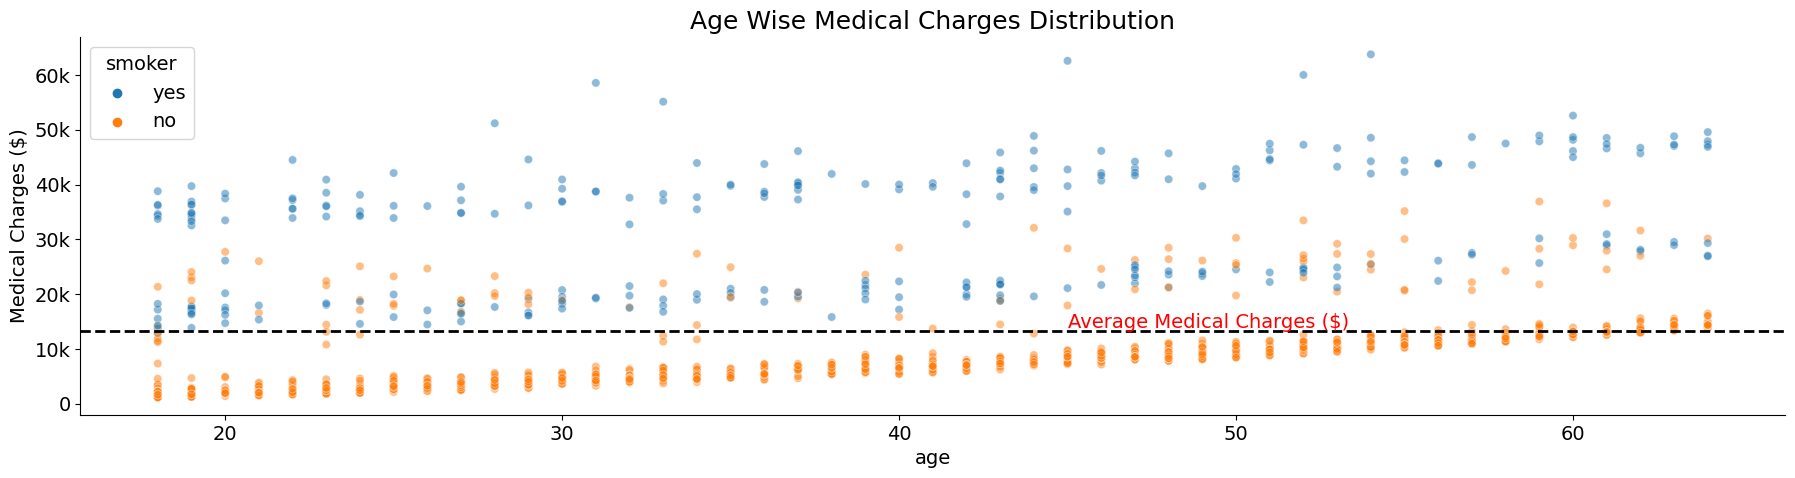

In [15]:
sns.scatterplot(y=medical_df['charges'], x=medical_df['age'], hue=medical_df['smoker'], alpha=0.5)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f'Average Medical Charges ($)', (45, 13900), fontsize=14,color='red')
plt.title('Age Wise Medical Charges Distribution', fontsize=18)
plt.ylabel('Medical Charges ($)')
plt.show()






<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> If someone who is in his later years of life and is a smoker, chances are they may end up spending a nice amount on insurance charges as opposed to the ones who are elderly and don't smoke.
</div>

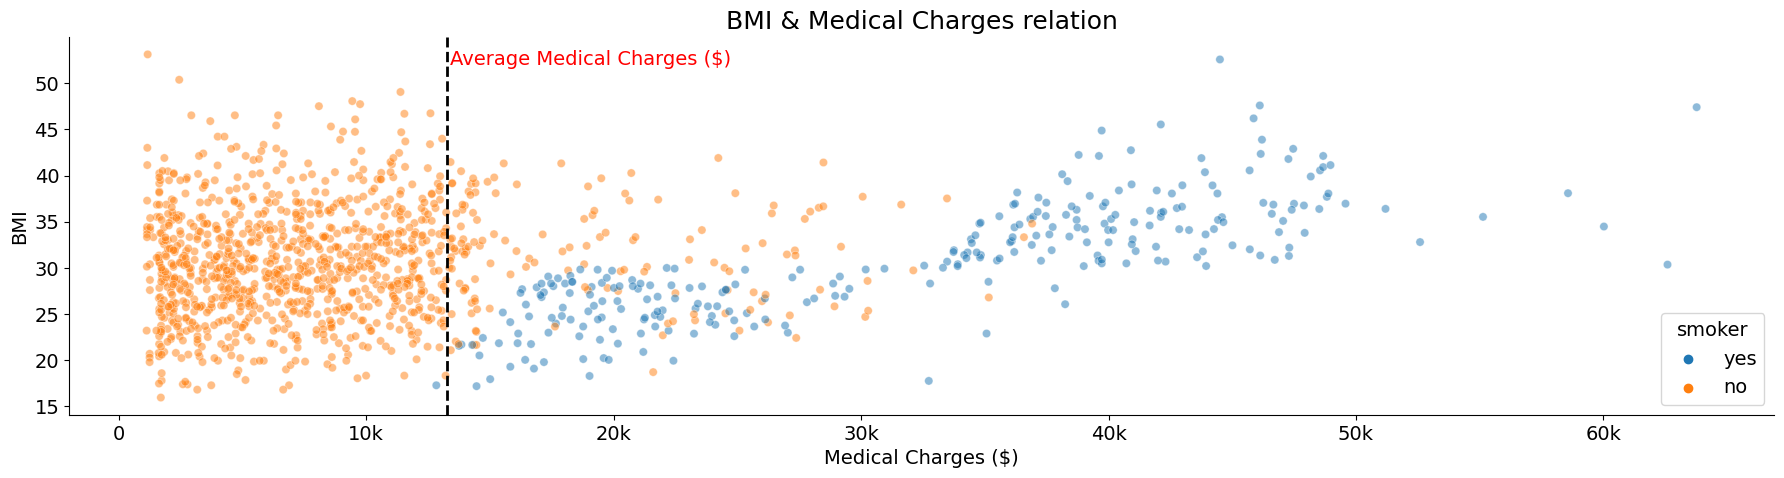

In [16]:
sns.scatterplot(y=medical_df['bmi'], x=medical_df['charges'], hue=medical_df['smoker'], alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
xticks = plt.gca().get_xticks()
xlabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in xticks]
plt.gca().set_xticklabels(xlabels)

plt.axvline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f'Average Medical Charges ($)', (13400, 52), fontsize=14, color='Red')

plt.title('BMI & Medical Charges relation', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.ylabel('BMI')
plt.show()

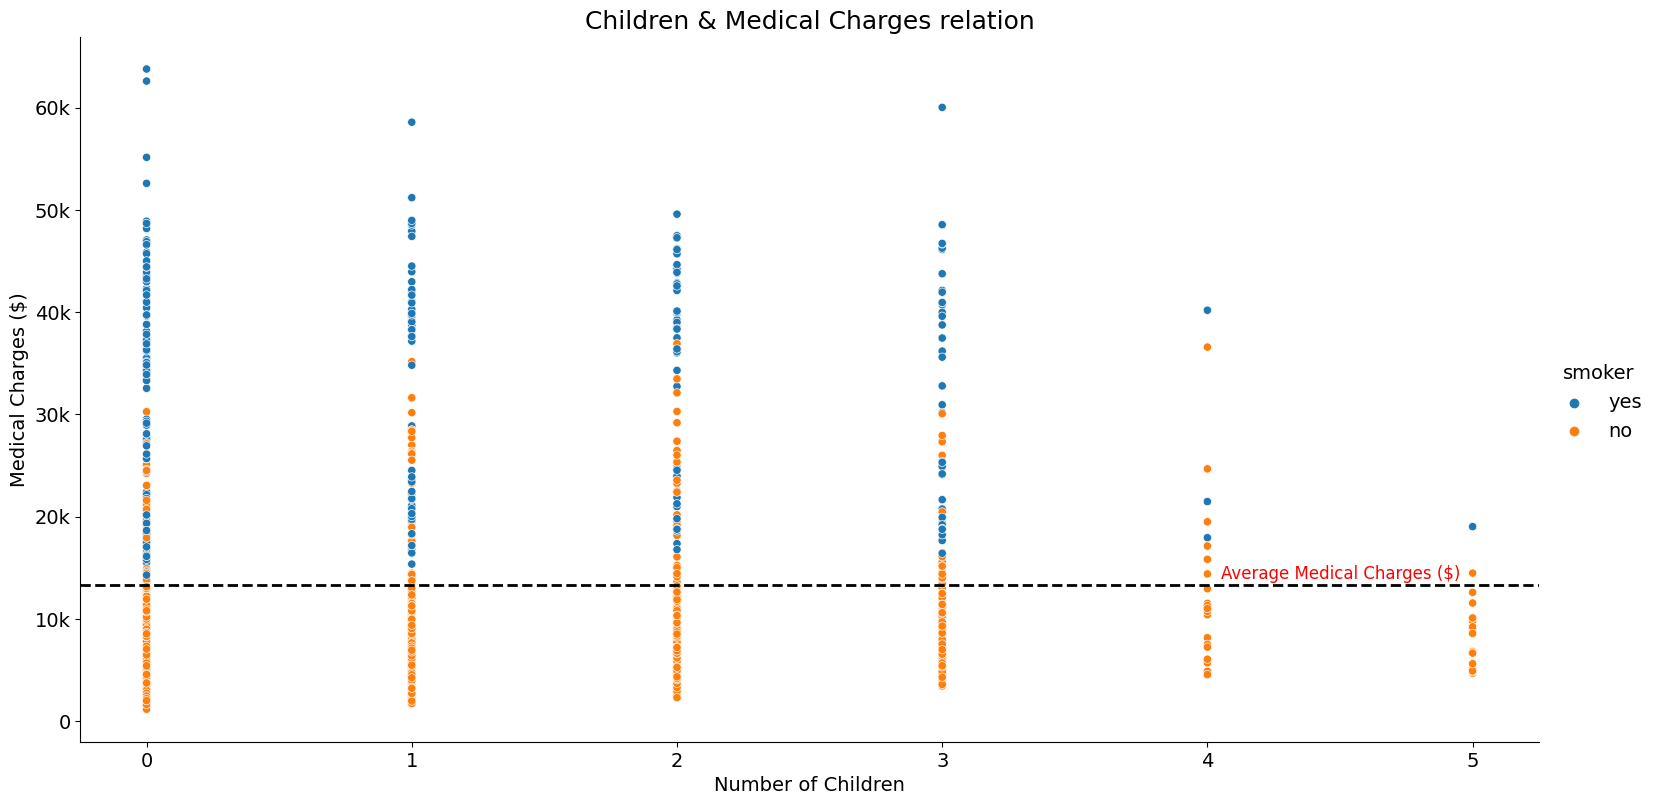

In [17]:
sns.relplot(data=medical_df, x='children', y='charges',  hue='smoker', aspect = 2, height=8)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.axhline(medical_df['charges'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f'Average Medical Charges ($)', (4.05 , 13900), fontsize=12, color='red')
plt.title('Children & Medical Charges relation', fontsize=18)
plt.ylabel('Medical Charges ($)')
plt.xlabel('Number of Children')
plt.show()




<div class="alert alert-block alert-info">  
<b>INTERPRETATION :</b> People with 0, 1 or 3 children are likely to spend more on insurance charges..
</div>

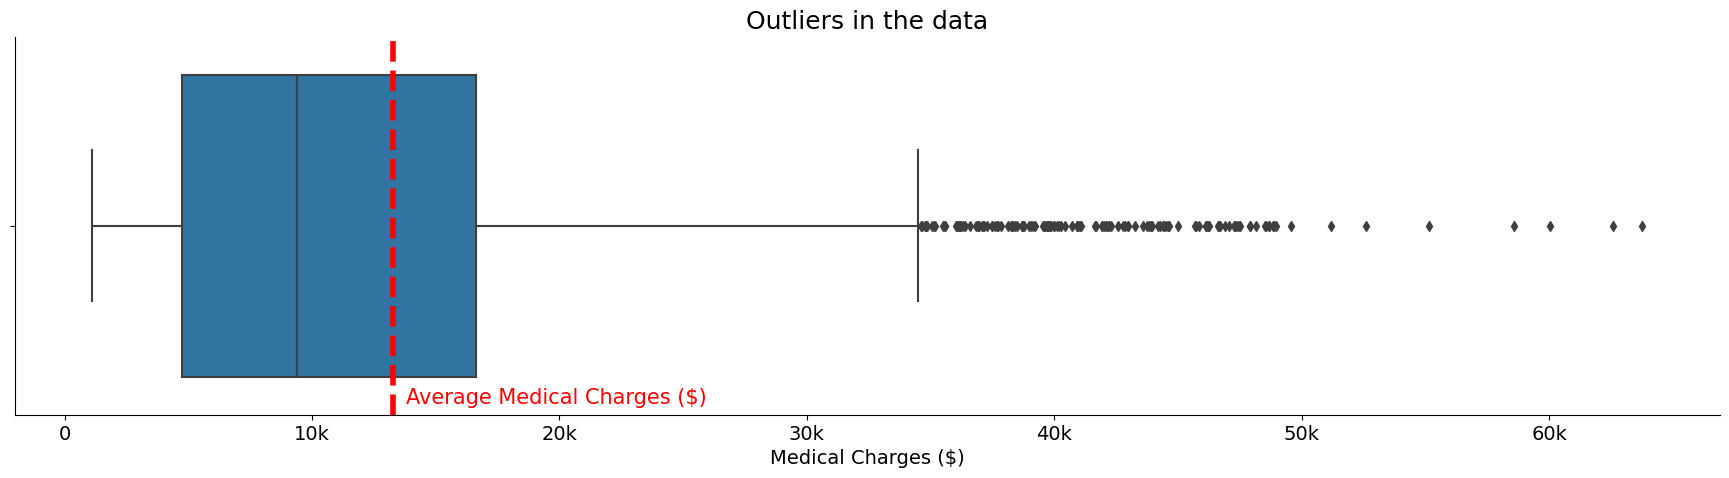

In [18]:
sns.boxplot(x=medical_df['charges'])
xticks = plt.gca().get_xticks()
xlabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in xticks]
plt.gca().set_xticklabels(xlabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(medical_df['charges'].mean(), linestyle='--', lw=4, zorder=1, color='red')
plt.annotate(f'Average Medical Charges ($)', (13800, 0.47), fontsize=15, color='red')
plt.title('Outliers in the data', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.show()

## DATA PREPROCESSING

### Outlier Detection And Removal

What constitutes an outlier? In essence, it denotes a data point that substantially deviates from the rest within a dataset. Although this description appears straightforward, the determination of what qualifies as an outlier is notably subjective, contingent upon the specific study and the comprehensive scope of data being gathered.

**Histograms emerge as a potent tool for unveiling outliers within univariate (single-variable) data**. By segmenting the value range into distinct groups, histograms visualize the frequency of data occurrences through bar charts. When organized sequentially, these data groups readily unveil outliers residing at the extreme ends of the histogram, either on the far left or far right.



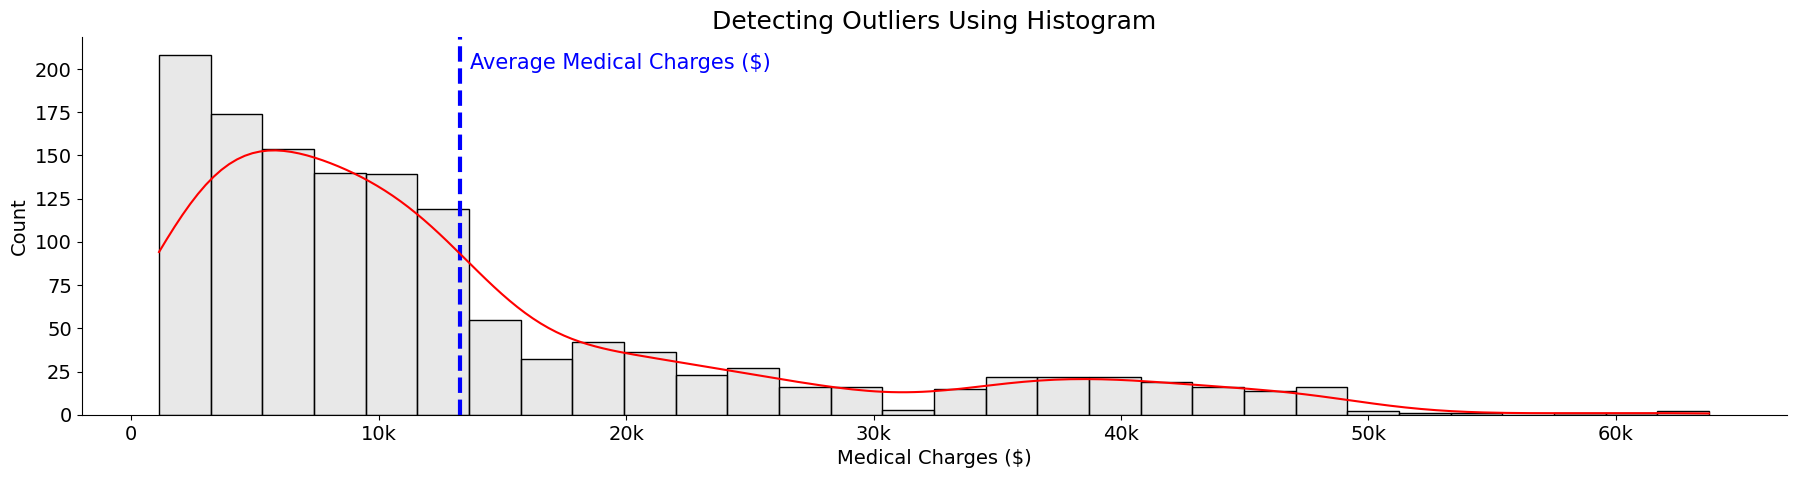

In [19]:
ax = sns.histplot(medical_df['charges'], kde=True, color='lightgray')
xticks = plt.gca().get_xticks()
xlabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in xticks]
plt.gca().set_xticklabels(xlabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
ax.lines[0].set_color('red')
plt.axvline(medical_df['charges'].mean(), linestyle='--', lw=3, zorder=1, color='blue')
plt.annotate(f'Average Medical Charges ($)', (13700, 200), fontsize=15, color='blue')
plt.title('Detecting Outliers Using Histogram', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.show()

In [20]:
# Extract the 'charges' column values from the medical_df DataFrame and sort them
data = sorted(medical_df['charges'].values)

# Calculate the mean and standard deviation of the sorted 'charges' data
data_mean, data_std = np.mean(data), np.std(data)

# Calculate the cutoff value, which is three times the standard deviation
cut_off = data_std * 3

# Calculate the lower and upper bounds for identifying potential outliers
lower, upper = data_mean - cut_off, data_mean + cut_off

# Print the calculated values with appropriate labels
print('Cut Off =', round(cut_off, 3))  # Display the calculated cutoff value
print('Lower =', round(lower, 3))      # Display the calculated lower bound for potential outliers
print('Upper =', round(upper, 3))      # Display the calculated upper bound for potential outliers

Cut Off = 36316.455
Lower = -23046.033
Upper = 49586.877


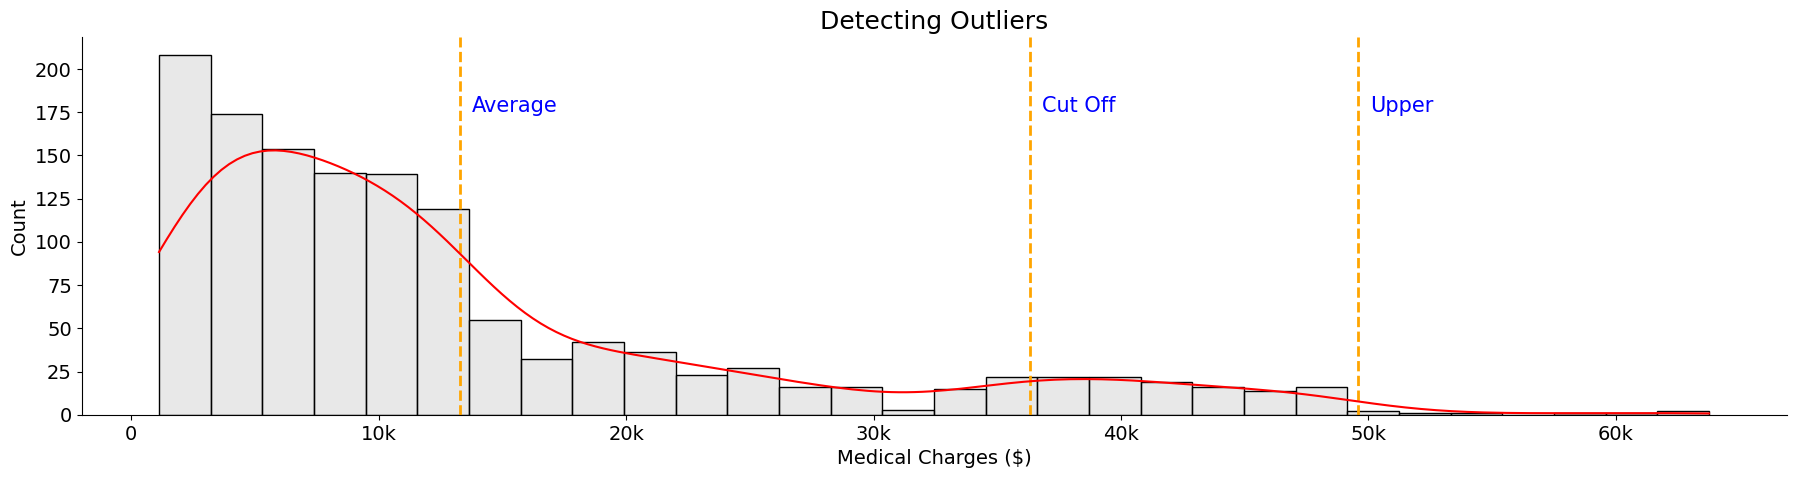

In [21]:
ax = sns.histplot(medical_df['charges'], kde=True, color='lightgray')
xticks = plt.gca().get_xticks()
xlabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in xticks]
plt.gca().set_xticklabels(xlabels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
ax.lines[0].set_color('red')
plt.axvline(data_mean, linestyle='--', lw=2, zorder=1, color='orange')
plt.annotate(f'Average', (data_mean+500, 175), fontsize=15, color='blue')

plt.axvline(upper, linestyle='--', lw=2, zorder=1, color='orange')
plt.annotate(f'Upper', (upper+500, 175), fontsize=15, color='blue')

plt.axvline(cut_off, linestyle='--', lw=2, zorder=1, color='orange')
plt.annotate(f'Cut Off', (cut_off+500, 175), fontsize=15, color='blue')

plt.title('Detecting Outliers', fontsize=18)
plt.xlabel('Medical Charges ($)')
plt.show()

In [22]:
medical_df = medical_df[medical_df['charges'] < upper]
medical_df = medical_df[medical_df['charges'] > lower]
print('The shape of our dataframe after the Outlier Removal is', medical_df.shape)

The shape of our dataframe after the Outlier Removal is (1331, 7)


Making a copy of the original dataframe to ensure the original data stays intact.

In [23]:
df = medical_df.copy()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:white;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">OneHotEncoding and Scaling
    
</h2>
</div>
    
</center>



### OneHotEncoding

![](https://i.imgur.com/n8GuiOO.png)

Read More on Encoding data <a href="https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/"> here</a>

In [24]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_cols = df.select_dtypes(include='object').columns
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [25]:
onehot =encoder.transform(df[cat_cols])
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
encoded_cols = [['female', 'male','smokerno', 'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']]
df[['female', 'male','smokerno', 'smokeryes', 'northeast', 'northwest', 'southeast', 'southwest']] = onehot
df.drop(cat_cols, axis=1, inplace=True )

In [27]:
df.head()

,age,bmi,children,charges,female,male,smokerno,smokeryes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
#Initializing a scaler object
scaler = MinMaxScaler()

In [29]:
# Extract the 'charges' column values and store them in y
y = df['charges'].values

# Drop the 'charges' column from the DataFrame to create the feature matrix X
X = df.drop('charges', axis=1).values

In [30]:
print('The shape of independent variables data is',X.shape)
print('The shape of the target variable data is',y.shape)

The shape of independent variables data is (1331, 11)
The shape of the target variable data is (1331,)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Finding the derivative equation
    
</h2>
</div>
    
</center>

$$\large MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Differentiating w.r.t to the weights**

Let start calculating the derivate of the MSE function using calculus with respect to the weights and the biases both. Let's say that using Power Rule we will get

$$\frac{dy}{dw} =  \frac{1}{n} \sum_{i=1}^{n} \space 2({y_{i} - \hat{y}_{i}})$$

Now we will have to differentiate the term $y_{i} - \hat{y}_{i}$. $y_{i}$ are constant values and constant values when differentiating become zero. We know from earlier that $\hat{y}_{i} = mx + b$ so we can substitute this value and we will get 

$$\frac{d}{dw} (y_{i} - \hat{y}_{i}) =  0 - (m * x + b)$$


which can then be simplified as  $\frac{d}{dw}  (y_{i} - \hat{y}_{i}) =  0 - (1 * x + 0)$ because $m$ and $w$ are the same thing and $b$ here is just another constant value so 

$$\frac{d}{dw}  (y_{i} - \hat{y}_{i}) =  -x $$

Finally our derivative with respect to the weights will be 


$$\frac{dy}{dw} =  \frac{-2}{n} \sum_{i=1}^{n} \space ({y_{i} - \hat{y}_{i}}) \space {x}$$

**Differentiating w.r.t to the bias**

For this, the steps are almost identical with a slight change in how we will calculate derivative of $y_{i} - \hat{y}_{i}$. First off let's apply the Power Rule which will get us:-

$$\frac{dy}{dw} =  \frac{1}{n} \sum_{i=1}^{n} \space 2({y_{i} - \hat{y}_{i}})$$

Now we will have to differentiate the term $y_{i} - \hat{y}_{i}$. $y_{i}$ are constant values and constant values when differentiating become zero. We know from earlier that $\hat{y}_{i} = mx + b$ so we can substitute this value and we will get 

$$\frac{d}{dw} (y_{i} - \hat{y}_{i}) =  0 - (m * x + b)$$

which can then be simplified as $\frac{d}{dw}  (y_{i} - \hat{y}_{i}) =  0 - (0 + 1)$ because whenever a third term comes into the equation, we zero it out and here $m$ and $x$ are the third terms since we are differentiating the cost with respect to $b$ so now

$$\frac{d}{dw} (y_{i} - \hat{y}_{i}) =  -1 $$

Finally our derivative with respect to the weights will be 


$$\frac{dy}{dw} =  \frac{-2}{n} \sum_{i=1}^{n} \space ({y_{i} - \hat{y}_{i}})$$


**Final derivative**

$$\frac{\partial{y}}{\partial{x}_{b}} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$$


$$\frac{\partial{y}}{\partial{x}_{w}} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \space x$$


**Parameter update rule** 

$$ W_{new} = W_{old} - \eta \space \frac {dL}{dW}$$

$$b_{new} = b_{old} - \eta \space \frac {dL}{db}$$

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Visualization of how gradient descent works
    
</h2>
</div>
    
</center>

![](https://baptiste-monpezat.github.io/6f5cc892ec345d96f64c881b62b0d910/gradient_descent_parameter_a.gif)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Building a model and training
    
</h2>
</div>
    
</center>

In [31]:
# Function for calculating the EarlyStopping criteria by comparing consecutive losses
def EarlyStopping(loss):
    for i in range(1, len(loss)):
        yield (loss[i-1], loss[i])

# Function to determine the number of batches based on batchsize and the size of the dataset
def batch_size(batchsize, X):
    batches = round(X.shape[0] // batchsize)
    return batches

# Gradient Descent Function for linear regression
def regression_gradient_descent(X_train, y_train, m, b):
    # Predictions using the linear equation y = mx + b
    yhat = np.dot(X_train, m) + b

    # Mean Squared Error (MSE) calculation
    MSE = (np.sum((y_train - yhat)**2)) / N

    # R-squared calculation to measure the goodness of fit
    r_squared = r2_score(y_train, yhat)

    # Calculate the gradient of the loss function with respect to intercept 'b'
    loss_slope_b = -(2/N) * sum(y_train - yhat)

    # Calculate the gradient of the loss function with respect to the slope 'm'
    loss_slope_m = -(2/N) * (np.dot((y_train - yhat), X_train))

    # Update the slope 'm' and intercept 'b' using the gradient descent update rule
    m = m - (learning_rate * loss_slope_m)
    b = b - (learning_rate * loss_slope_b)

    return m, b, MSE, r_squared

Let's go over the code above 

**Code Explanation**

This code snippet comprises three essential functions: `EarlyStopping`, `batch_size`, and `regression_gradient_descent`.

**EarlyStopping Function**

The `EarlyStopping` function is designed to facilitate early stopping during training by comparing consecutive loss values. It is implemented as a generator, which sequentially provides pairs of adjacent loss values. This functionality aids in monitoring the optimization process and determining when to halt training based on loss trends.

**`batch_size` Function**

The `batch_size` function serves the purpose of determining the optimal number of batches in a dataset based on a specified batch size. Given the desired batch size and the total size of the dataset, this function calculates and returns the appropriate number of batches for efficient processing during training.

**`regression_gradient_descent`**

The `regression_gradient_descent` function plays a central role in performing gradient descent optimization specifically tailored for linear regression tasks. Within this function, the following tasks are executed:

1. **Prediction**: Utilizing the linear regression equation (y = mx + b), the function computes predicted values (yhat) based on the input features (X_train) and the slope (m) and intercept (b) coefficients.

2. **Mean Squared Error (MSE) Calculation**: The function calculates the Mean Squared Error by evaluating the squared differences between the true target values (y_train) and the predicted values (yhat). The sum of these squared differences is divided by the number of samples (N) to yield the MSE.

3. **R-squared Computation**: The R-squared metric is determined to assess the quality of the linear regression fit. It measures the proportion of the variance in the target variable explained by the model's predictions.

4. **Gradient Calculation and Parameter Update**: The gradients of the loss function with respect to the intercept (b) and slope (m) are computed. These gradients guide the adjustment of the parameters to minimize the loss. The learning rate (learning_rate) determines the step size of the parameter updates.

By integrating these steps, the `regression_gradient_descent` function optimizes the linear regression model by iteratively adjusting the slope and intercept parameters to minimize the loss function and improve the model's predictive performance.

In [32]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Set a random seed for reproducibility
np.random.seed(0)

# Calculate the total number of data points
N = X.shape[0]

# Set the initial learning rate, decay rate, and other variables
learning_rate = 0.2
decay_rate = 0.01
LR = []  # List to store learning rates
ValidationLoss = []  # List to store validation loss
Trainingloss = []  # List to store training loss
batchsize = 30

# Initialize the intercept and slope
Intercept = []
Slope = []
m = np.ones(X.shape[1])  # Initializing some initial values for the slope
b = 1  # Initializing some initial values for the intercept
print('The initial Value of w and b are', m, b)

# Calculate the number of batches
batches = batch_size(batchsize, X)

num_epochs =  2000

# Loop over multiple epochs for training
for i in range(num_epochs):
    epoch = i
    
    # Loop over batches within the current epoch
    for j in range(batches):
        if i == 0:
            # Initial epoch updates (no decay rate applied)
            if j % batchsize == 0:
                learning_rate = learning_rate  # Maintain initial learning rate
                np.random.seed(0)
                np.random.shuffle([X_train_scaled, y_train])
                m, b, MSE, r_squared = regression_gradient_descent(X_train_scaled, y_train, m, b)
                m_test, b_test, MSE_test, r_squared_test = regression_gradient_descent(X_test_scaled, y_test, m, b)
            else:
                m = m
                b = b
        else:
            # Updates with decay rate applied
            if j % batchsize == 0:
                learning_rate = [(1 / (1 + decay_rate)) * learning_rate for j in range(batches)][0]
                np.random.seed(0)
                np.random.shuffle([X_train_scaled, y_train])
                m, b, MSE, r_squared = regression_gradient_descent(X_train_scaled, y_train, m, b)
                m_test, b_test, MSE_test, r_squared_test = regression_gradient_descent(X_test_scaled, y_test, m, b)
            else:
                m = m
                b = b

    # Store values for analysis and tracking
    Intercept.append(b)
    Slope.append(m)
    Trainingloss.append(MSE)
    ValidationLoss.append(MSE_test)
    LR.append(learning_rate)
    
    # Print progress every 20 epochs
    if i % 100 == 0:
        print(f'Epoch: {i}/{num_epochs} [==============================] - Loss: {MSE:.2e} - val Loss: {MSE_test:.2e} - r-squared: {round(r_squared, 4)} - val_r-squared: {round(r_squared_test, 4)}')

       
    # Early Stopping Mechanism
    for prev, curr in EarlyStopping(ValidationLoss):
        if prev - curr < 1e-6:
            print(f'\n -- Early Stopping at Epoch : {i} val_loss : {np.around(MSE_test, 5)},  val r-squared : {np.around(r_squared_test, 5)} --')
            break  # Inner Loop Break
    else: 
        continue  # Executed if the inner loop did NOT break
    break  # Executed if the inner loop DID break

# Print the final values of slope 'm' and intercept 'b'
print('\nThe final values of w and b are', m, b)

The initial Value of w and b are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1
Epoch: 0/2000 [==============================] - Loss: 1.03e+08 - val Loss: 2.82e+07 - r-squared: 0.0134 - val_r-squared: 0.1139
Epoch: 100/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.55e+06 - r-squared: 0.7408 - val_r-squared: 0.7631
Epoch: 200/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.51e+06 - r-squared: 0.7414 - val_r-squared: 0.7643
Epoch: 300/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.50e+06 - r-squared: 0.7415 - val_r-squared: 0.7645
Epoch: 400/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.50e+06 - r-squared: 0.7415 - val_r-squared: 0.7645
Epoch: 500/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.50e+06 - r-squared: 0.7415 - val_r-squared: 0.7645
Epoch: 600/2000 [==============================] - Loss: 2.71e+07 - val Loss: 7.50e+06 - r-squared: 0.7415 - val_r-squared: 0.7645
Epoch: 700/2000

**Code Explanation**

This code snippet trains a linear regression model using gradient descent and implements an early stopping mechanism for improved training efficiency. Here's a summary of its key functionalities:

1. **Setup and Initialization:**
   - A random seed is set to ensure reproducibility.
   - Key parameters like learning rate, decay rate, and batch size are initialized.
   - Lists are prepared to store training-related metrics.

2. **Training Loop:**
   - The code iterates over multiple epochs, representing passes through the entire dataset.
   - Within each epoch, the code loops over data batches to perform updates.
   - The learning rate can decay over epochs to fine-tune learning.

3. **Gradient Descent Updates:**
   - Gradient descent updates are performed to adjust the model's slope (m) and intercept (b).
   - Training and validation Mean Squared Error (MSE) and R-squared metrics are calculated.

4. **Results Tracking and Printing:**
   - Parameters like intercept, slope, and loss values are stored for analysis.
   - Progress is printed periodically, showing the current epoch, loss, and R-squared metrics.

5. **Early Stopping Mechanism:**
   - The code monitors validation loss trends using an early stopping approach.
   - If the validation loss fails to decrease significantly, the training is halted early.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Making Predictions
    
</h2>
</div>
    
</center>

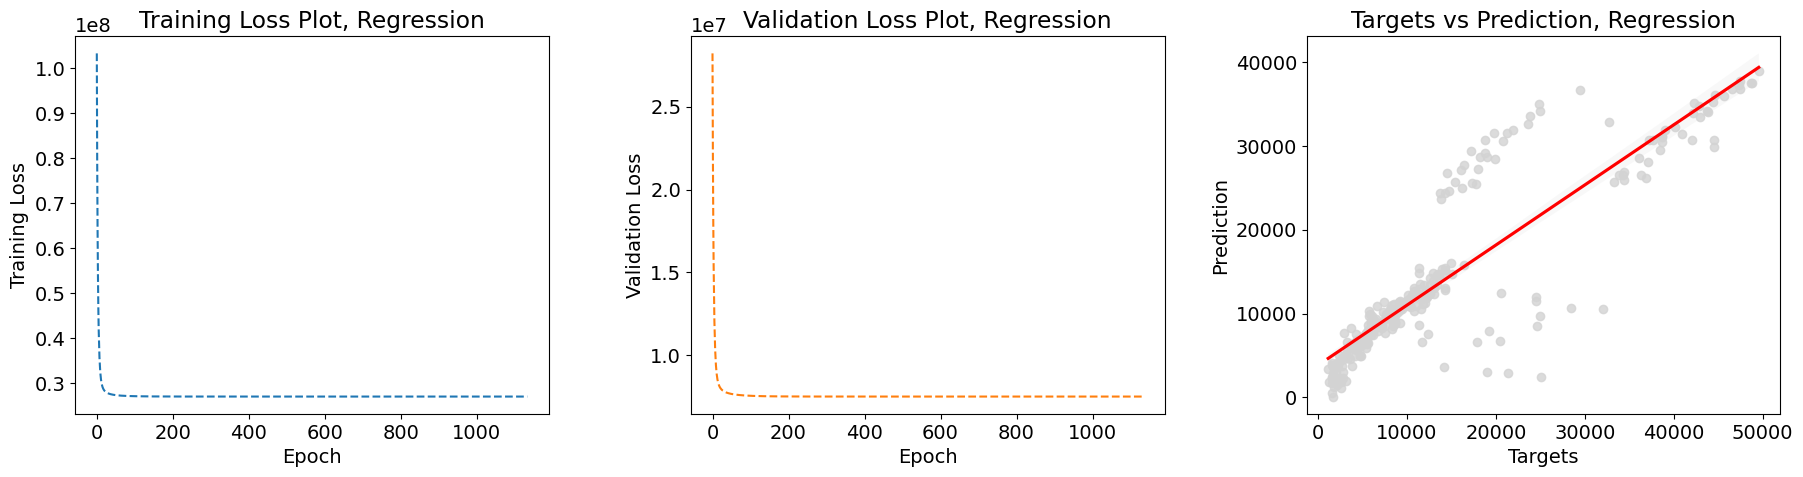

In [35]:
# Get the coefficient (slope) and intercept values for the current epoch
coefficient = Slope[epoch]
intercept = Intercept[epoch]

# Predictions using the linear regression equation y = mx + b
y_pred = np.dot(X_test_scaled, coefficient) + intercept

# Create a DataFrame to compare predicted and actual values
df = pd.DataFrame(y_pred, y_test, columns=['y']).reset_index().rename(columns={'index': 'y', 'y': 'y_pred'})

# Plotting the Figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 5))
fig.subplots_adjust(hspace=.2, wspace=.3)

# First Plot: Training Loss Plot
ax1.plot(Trainingloss, linestyle='--')
ax1.set_title("Training Loss Plot, Regression")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

# Second Plot: Validation Loss Plot
ax2.plot(ValidationLoss, 'tab:orange', linestyle='dashed', markersize=5)
ax2.set_title("Validation Loss Plot, Regression")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Loss')

# Third Plot: Scatter Plot of Targets vs. Predictions
ax3 = sns.regplot(data=df, x=df['y'], y=df['y_pred'], color='lightgray', fit_reg=True)
ax3.lines[0].set_color('red')
ax3.set_title('Targets vs Prediction, Regression')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Prediction')

# Display the plots
plt.show()



<center>
<div class="alert alert-block alert-success">  
By Implementing a Mini-Batch Gradient Descent we have been able to accomplish the same results in lesser epochs. This concept really helps when we have large amounts of data to work with..
</div>
    
</center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Gradient Descent for Classification
    
</h2>
</div>
    
</center>

Logistic regression emerges as a powerful tool tailored for tackling classification quandaries, particularly those where the outcome is characterized by discrete, categorical values. This method finds its prime application in the realm of binary classification, an endeavor marked by the presence of two distinct possible outcomes.

As the nomenclature implies, binary classification scenarios encompass a dichotomous spectrum of choices. Within this framework, the sigmoid function, also known as the logistic function, takes center stage. It serves as a transformative conduit, orchestrating the metamorphosis of input values spanning a vast continuum into a confined interval.

The sigmoid function's role proves pivotal; it reconfigures the expansive gamut of input values into a compact range, enabling the classification process to operate within defined boundaries. In this way, logistic regression deftly navigates the nuances of binary classification, molding intricate input-output relationships into a comprehensible and actionable form.

<center>
<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2021/01/log-reg-sigmoid.png">
</center>


The Sigmoid Function formula encapsulates the probability associated with observing the output $y = 1$ from a Bernoulli random variable—an entity that assumes values of either 1 or 0. While linear regression employs the mean squared error (MSE) as its preferred cost function, logistic regression takes a distinct route.

In logistic regression, opting for the mean of squared discrepancies between actual and predicted outcomes as the cost function could lead to a convoluted, undulating solution landscape. This intricate terrain may host numerous local optima, contributing to heightened complexity during optimization processes.

<center>
<img src="https://miro.medium.com/max/992/1*eetskzKtJEDvzYnINgXpmQ.png">
</center>


Mathematically the sigmoid is defined by the formula:
$$ y =  \frac {1}{1+e^{-x}}$$

In [36]:
#Loading the Data
data = load_breast_cancer()
cancerdf = pd.DataFrame(data=data.data, columns=data.feature_names)
cancerdf['target'] = data.target
cols = list(cancerdf.columns)
cancerdf.columns = [i.replace(" ","") for i in cols]
cancerdf.head()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,radiuserror,textureerror,perimetererror,areaerror,smoothnesserror,compactnesserror,concavityerror,concavepointserror,symmetryerror,fractaldimensionerror,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
cancerdf.describe().T

,count,mean,std,min,25%,50%,75%,max
meanradius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
meantexture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
meanperimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
meanarea,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
meansmoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
meancompactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
meanconcavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
meanconcavepoints,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
meansymmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
meanfractaldimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [38]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meanradius             569 non-null    float64
 1   meantexture            569 non-null    float64
 2   meanperimeter          569 non-null    float64
 3   meanarea               569 non-null    float64
 4   meansmoothness         569 non-null    float64
 5   meancompactness        569 non-null    float64
 6   meanconcavity          569 non-null    float64
 7   meanconcavepoints      569 non-null    float64
 8   meansymmetry           569 non-null    float64
 9   meanfractaldimension   569 non-null    float64
 10  radiuserror            569 non-null    float64
 11  textureerror           569 non-null    float64
 12  perimetererror         569 non-null    float64
 13  areaerror              569 non-null    float64
 14  smoothnesserror        569 non-null    float64
 15  compac

In [39]:
cancerdf.to_sql('cancer_data', conn, if_exists='replace', index=False)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Exploratory Data Analysis
    
</h2>
</div>
    
</center>

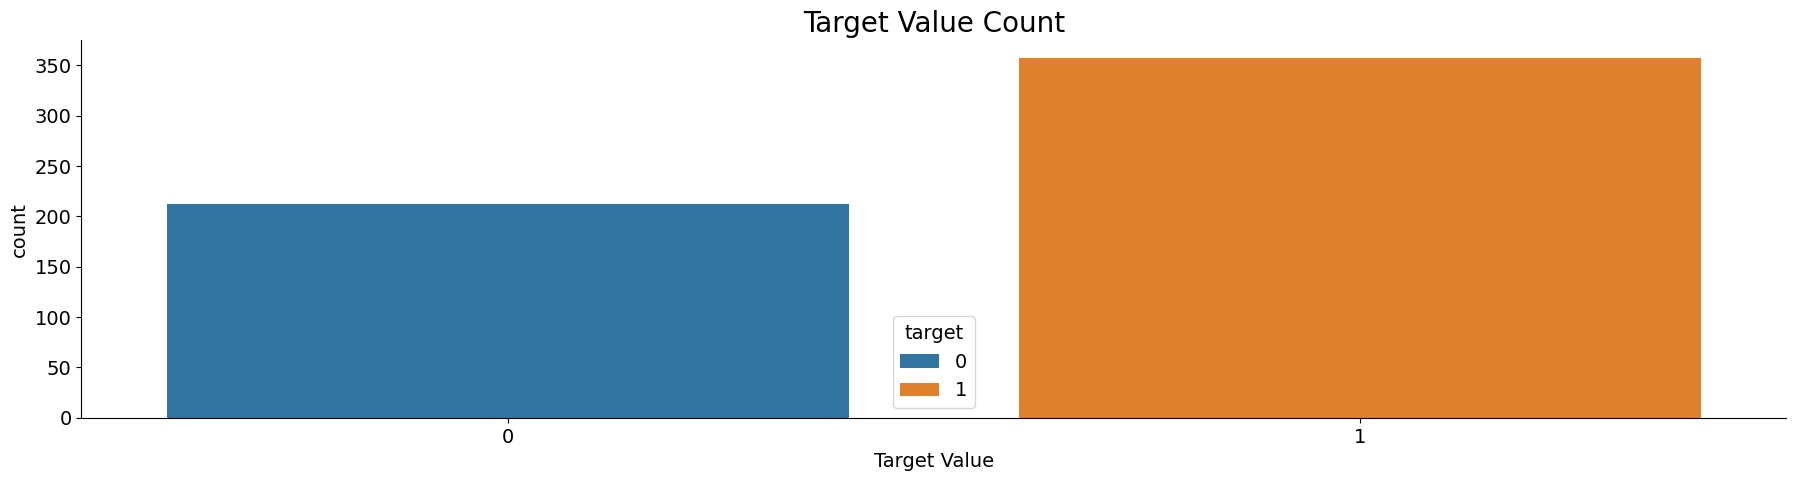

In [40]:
sns.countplot(cancerdf['target'], hue= cancerdf['target'],dodge=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Target Value Count', fontsize=20)
plt.xlabel('Target Value')
plt.show()

Which features have the highest average values for malignant cases (target = 1) compared to benign cases (target = 0)?

In [41]:
query = '''
SELECT 
    target,
    AVG(meanradius) AS avg_mean_radius,
    AVG(meantexture) AS avg_mean_texture,
    AVG(meanperimeter) AS avg_mean_perimeter,
    AVG(meanarea) AS avg_mean_area,
    AVG(meansmoothness) AS avg_mean_smoothness
    
FROM 
    cancer_data
GROUP BY 
    target;
'''
temp = pd.read_sql(query, conn)
temp

,target,avg_mean_radius,avg_mean_texture,avg_mean_perimeter,avg_mean_area,avg_mean_smoothness
0,0,17.462830,21.604906,115.365377,978.376415,0.102898
1,1,12.146524,17.914762,78.075406,462.790196,0.092478


Benign tumors (target = 0) have higher average values for mean_radius, mean_texture, mean_perimeter, and mean_area compared to malignant tumors (target = 1), while the mean_smoothness is slightly higher for benign tumors, suggesting that benign tumors tend to be larger and smoother on average.

Do “worst” metrics have higher values than “mean” metrics for malignant cases?

In [42]:
query = '''
SELECT 
target,
    AVG(meanradius) AS avg_mean_radius,
    AVG(worstradius) AS avg_worst_radius,
    AVG(meanperimeter) AS avg_mean_perimeter,
    AVG(worstperimeter) AS avg_worst_perimeter,
    AVG(meanarea) AS avg_mean_area,
    AVG(worstarea) AS avg_worst_area
    
FROM 
    cancer_data
GROUP BY 
    target;
'''
temp = pd.read_sql(query, conn)
temp

,target,avg_mean_radius,avg_worst_radius,avg_mean_perimeter,avg_worst_perimeter,avg_mean_area,avg_worst_area
0,0,17.462830,21.134811,115.365377,141.370330,978.376415,1422.286321
1,1,12.146524,13.379801,78.075406,87.005938,462.790196,558.899440


Benign tumors (target = 0) tend to have larger sizes (radius, perimeter, area) than malignant tumors (target = 1), with “worst” metrics highlighting more compact malignant cases, suggesting these features could help differentiate between the two.

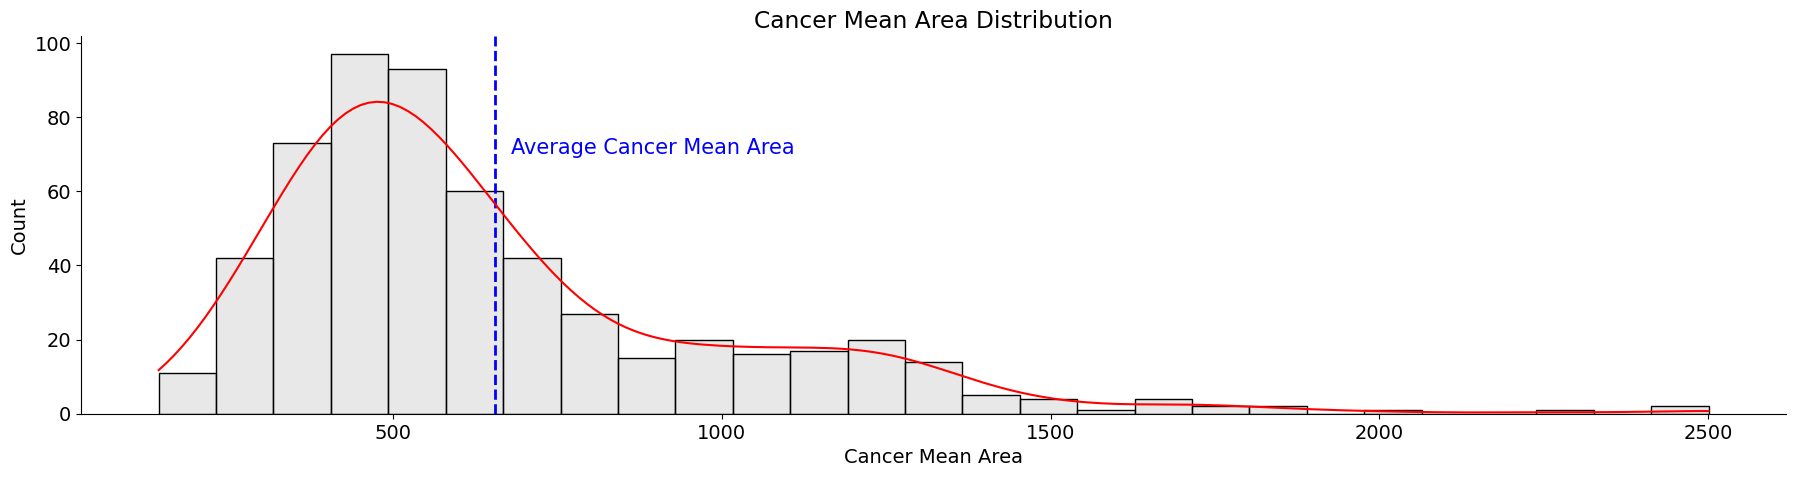

In [43]:
ax = sns.histplot(cancerdf['meanarea'], kde=True, color='lightgray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
ax.lines[0].set_color('red')

plt.axvline(cancerdf['meanarea'].mean(), linestyle='--', lw=2, zorder=1, color='blue')
plt.annotate(f'Average Cancer Mean Area', (680, 70), fontsize=15, color='blue')

plt.title('Cancer Mean Area Distribution')
plt.xlabel('Cancer Mean Area')
plt.show()

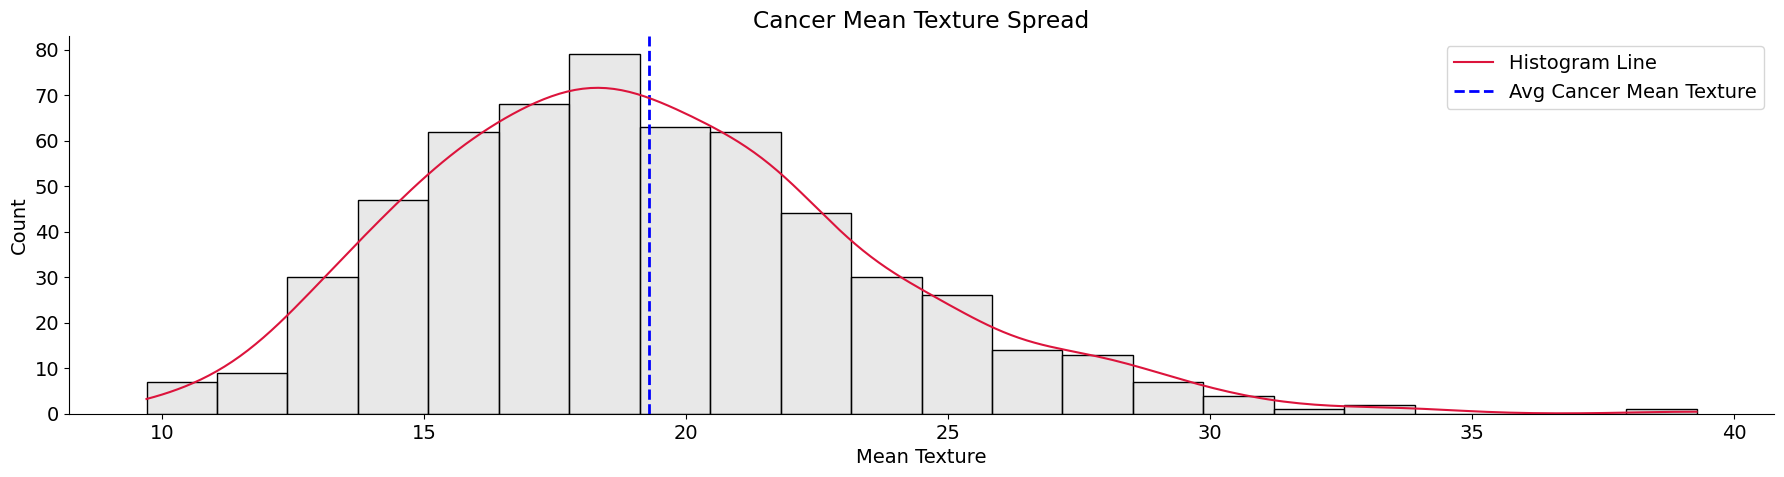

In [44]:
ax = sns.histplot(cancerdf['meantexture'], kde=True, color='lightgray')

ax.lines[0].set_color('crimson')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(cancerdf['meantexture'].mean(), linestyle='--', lw=2, zorder=1, color='blue')
plt.legend(['Histogram Line', 'Avg Cancer Mean Texture'])
plt.title('Cancer Mean Texture Spread')
plt.xlabel('Mean Texture')
plt.show()

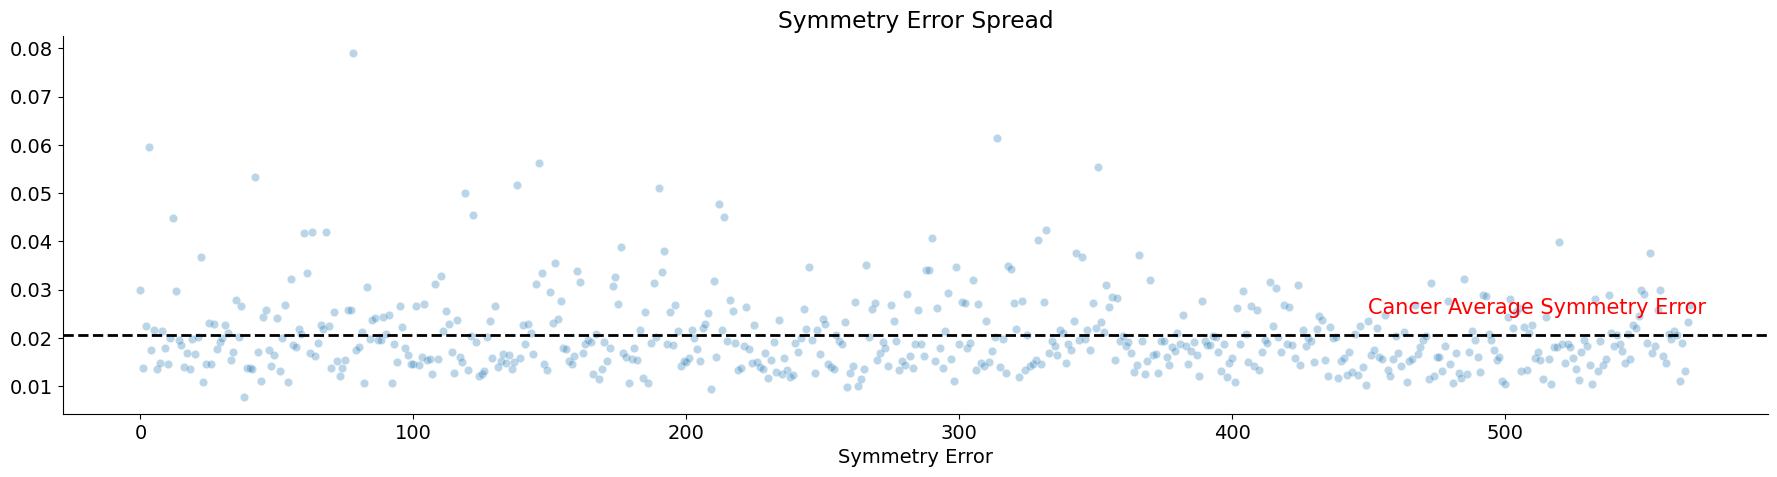

In [45]:
sns.scatterplot(data=cancerdf['symmetryerror'], color = 'C0', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(cancerdf['symmetryerror'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f'Cancer Average Symmetry Error', (450, 0.025), fontsize=15, color='red')

plt.title('Symmetry Error Spread')
plt.xlabel('Symmetry Error')
plt.ylabel('')
plt.show()

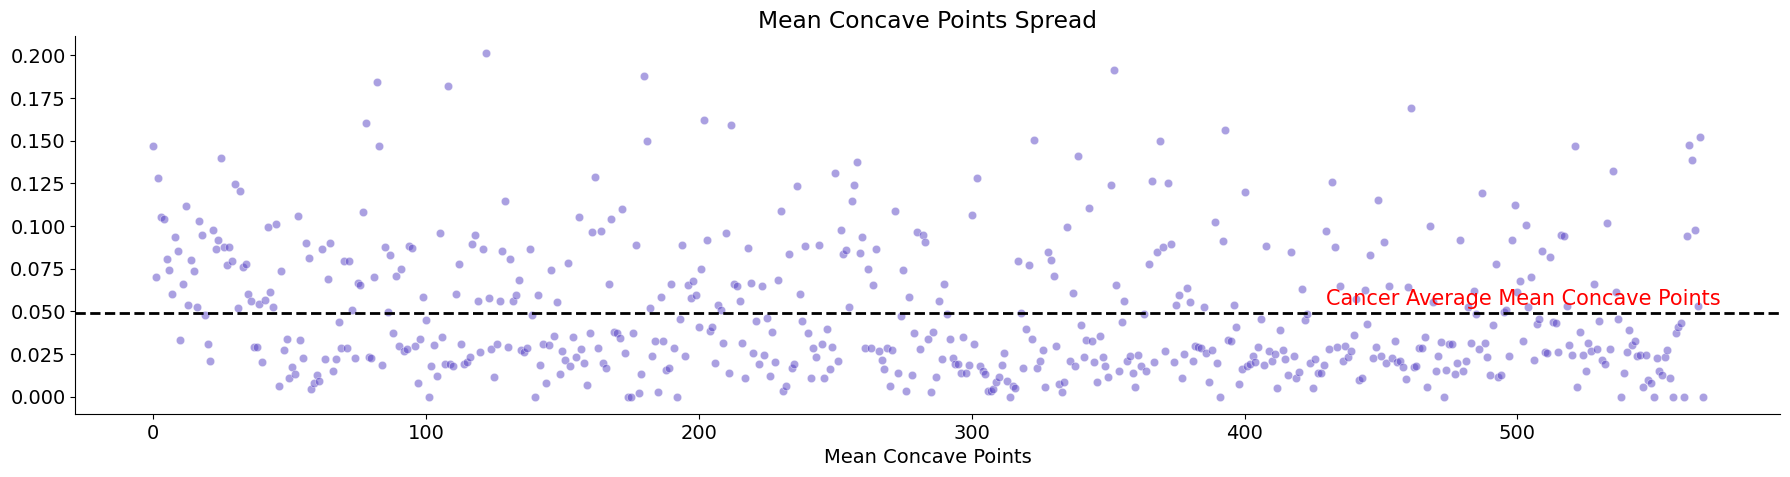

In [46]:
sns.scatterplot(data=cancerdf['meanconcavepoints'], color = '#5642C5', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(cancerdf['meanconcavepoints'].mean(), linestyle='--', lw=2, zorder=1, color='black')
plt.annotate(f'Cancer Average Mean Concave Points', (430, 0.054), fontsize=15, color='red')

plt.title('Mean Concave Points Spread')
plt.xlabel('Mean Concave Points')
plt.ylabel('')
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Data Pre-Processing
    
</h2>
</div>
    
</center>

In [47]:
input_cols = list(cancerdf.columns[:-1])
target_col =  cancerdf.columns[-1]

In [48]:
inputs_df = cancerdf[list(input_cols)].copy()
inputs_df.head()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,radiuserror,textureerror,perimetererror,areaerror,smoothnesserror,compactnesserror,concavityerror,concavepointserror,symmetryerror,fractaldimensionerror,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
targets = cancerdf[(target_col)]
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [50]:
#scaling the values
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,radiuserror,textureerror,perimetererror,areaerror,smoothnesserror,compactnesserror,concavityerror,concavepointserror,symmetryerror,fractaldimensionerror,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Dimensionality Reduction
    
</h2>
</div>
    
</center>

Dimensionality refers to the count of input features, variables, or columns residing within a given dataset. The process of curtailing these features is aptly termed as dimensionality reduction. This technique is characterized by its mission: to transform a dataset replete with higher dimensions into a more streamlined counterpart, while retaining comparable information content.

In essence, dimensionality reduction endeavors to distill the essence of intricate data representations, all the while engendering a reduction in complexity. This methodological approach finds its vantage point within the domain of machine learning, where its role becomes especially pronounced in refining predictive models tailored for classification and regression quandaries.

In practical scenarios, datasets frequently encompass an abundance of input features, potentially culminating in a perplexing predictive modeling task. This complexity can impede visualizations and predictions, particularly for training datasets boasting an excessive array of features. To circumvent this predicament, dimensionality reduction techniques step onto the stage, serving as invaluable allies in the quest to unravel intricate patterns and enhance the efficacy of predictive models.

<center>
<img src="https://miro.medium.com/max/959/1*kK4aMPHQ89ssFEus6RT4Yw.jpeg">
</center>

Some common feature extraction techniques are:

1. Principal Component Analysis
2. Linear Discriminant Analysis
3. Kernel PCA
4. Quadratic Discriminant Analysis

In [51]:
#Fetching the Column Values 
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)
    
#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

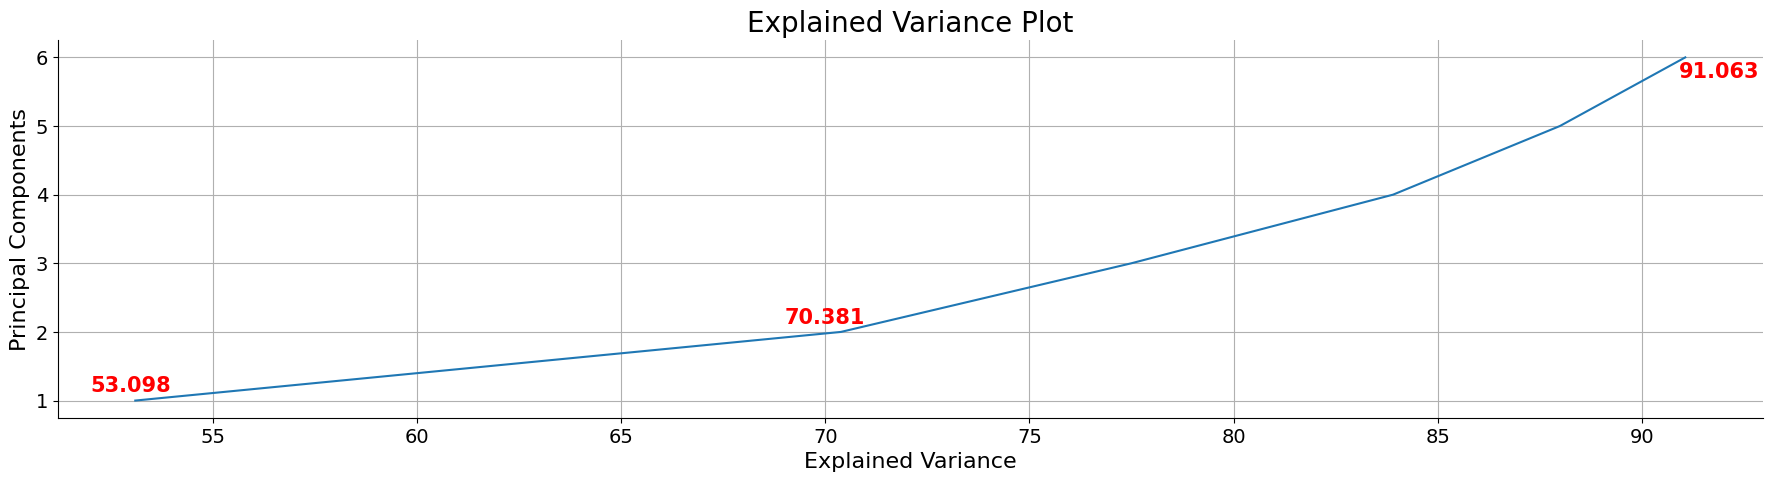

In [52]:
explained_variance = []
cumulative_variance = 0

# Calculate the percentage explained by each eigenvalue
for eigenvalue in eigen_values:
    percentage = np.around((eigenvalue / np.sum(eigen_values)) * 100, 3)
    cumulative_variance += percentage
    
    # Append cumulative variance if it's less than 92%
    if cumulative_variance <= 92:
        explained_variance.append(cumulative_variance)
        
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.annotate(f'{explained_variance[1]}', (69, 2.12), fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{explained_variance[0]}', (52, 1.12), fontsize=15,  fontweight='bold', color='red')
plt.annotate(f'{explained_variance[-1]}', (90.9, 5.7), fontsize=15, fontweight='bold', color='red')

plt.title('Explained Variance Plot', fontsize=20)
plt.xlabel('Explained Variance', fontsize=16)
plt.ylabel('Principal Components',fontsize=16)
plt.grid(True)
plt.show()

Convert the original data using the new Prinicipal Components

In [53]:
pc = eigen_vectors[0:6]
transformed_df = np.dot(cancerdf.iloc[:,0:30],pc.T)
new_df = pd.DataFrame(transformed_df,columns=["PC"+str(i+1) for i in range(len(pc))])
new_df['Target'] = cancerdf['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Target
0,-490.323126,57.532233,-560.332133,976.250487,44.523173,87.107975,0
1,-459.193639,51.213896,-550.911644,969.667201,-12.364889,98.615713,0
2,-409.647345,51.258794,-470.716811,850.415771,3.704912,87.527984,0
3,-180.923189,36.275884,-133.428055,281.134522,-2.062187,31.496752,0
4,-376.688989,49.610695,-415.941723,797.618124,-1.963641,81.224969,0


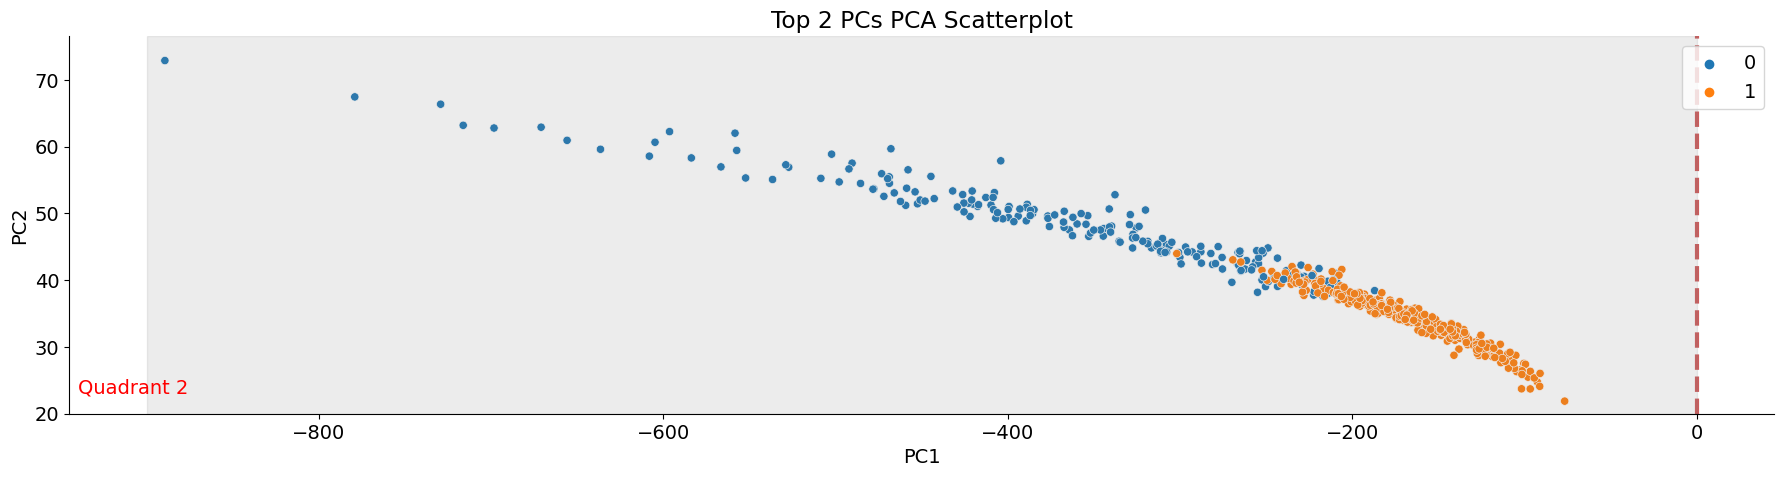

In [54]:
new_df['Target'] = new_df['Target'].astype('str')
sns.scatterplot(data= new_df,
                 x=new_df['PC1'],
                 y=new_df['PC2'],
               hue=new_df['Target'])
plt.title('Top 2 PCs PCA Scatterplot')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(0, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(0, linestyle='--', lw=3, zorder=1, color='indianred')
plt.axvspan(0,-900, alpha=0.15, zorder=1, color='gray')

plt.annotate(f'Quadrant 2', (-940, 23), fontsize=14,color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(20)
plt.legend(loc='upper right')
plt.show()

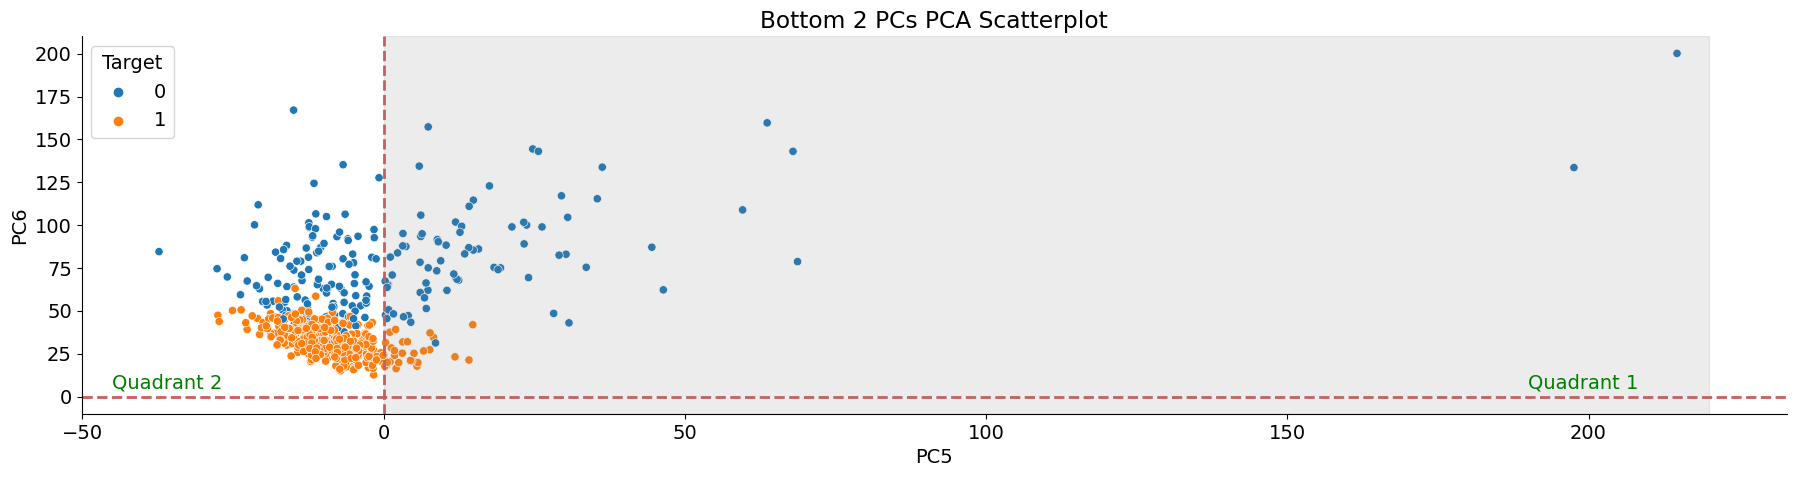

In [55]:
sns.scatterplot(data= new_df,x=new_df['PC5'],y=new_df['PC6'],hue=new_df['Target'])
plt.title('Bottom 2 PCs PCA Scatterplot')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

plt.axhline(0, linestyle='--', lw=2, zorder=1, color='indianred')
plt.axvline(0, linestyle='--', lw=2, zorder=1, color='indianred')
plt.axvspan(0,220, alpha=0.15, zorder=1, color='gray')

plt.annotate(f'Quadrant 1', (190, 5), fontsize=14,color='green')
plt.annotate(f'Quadrant 2', (-45, 5), fontsize=14,color='green')

plt.xlabel('PC5')
plt.ylabel('PC6')
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Splitting the data
    
</h2>
</div>
    
</center>

In [56]:
#getting the inputs
X = new_df.iloc[:,0:-1].values
new_df['Target'] = new_df['Target'].astype('int32')
#getting the labels
y = new_df.iloc[:,-1].values

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Finding the Derivative Equation
    
</h2>
</div>
    
</center>

We will be using **Sigmoid function** here to predict the output. The formula for sigmoid is $ S({x}) = \frac {1} { (1+e^{-x})}$ . 

We first of all calculate the probabilities using `Log Loss` and then pass the value to the sigmoid function which classifies it into either 0 or 1. The formula for the log_loss is as follows:-

$$ L = \frac {-1}{n} \space \Sigma\: [y_{i}\space log{y_i} + (1-y_{i}) \space log({1-y_i}) ]$$ 

The formula is sometimes referred to as `Binary Cross Entropy` due to its connection with maximum likelihood estimation. Initially, we compute the maximum likelihood, but the multiplication of probabilities can lead to exceedingly small values, rendering them impractical. To counter this, we take the logarithm of the probabilities. However, this introduces a conundrum: logarithms of smaller numbers yield larger values, and vice versa.

> To address this challenge, we employ the negative sign. Additionally, to encompass both potential outcomes, positive and negative, the formula comprises two terms. One for the positive outcome and the other for the negative outcome. This dual-term structure equips the formula to handle various scenarios, enabling the selection of the model that yields the lowest loss value. Since a closed form of this formula is absent, our reliance shifts to Gradient Descent. This optimization technique aids in identifying the parameter values that correspond to the minimum loss.

In essence, the `Binary Cross Entropy` formula encapsulates a nuanced interplay of probabilities, logarithms, and negative signs, ultimately steering us toward optimal model configurations through the iterative process of Gradient Descent.


### Deriving the derivatives using Calculus

The formula for log loss for a binary classification model is:

$$ \text{Log Loss} = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

Here $ \hat{y}_i $ is the predicted probability of the $ i $-th sample belonging to class 1, and it is typically modeled using a logistic function in the case of logistic regression:

$$ \hat{y}_i = \sigma(w \cdot x_i + b) $$

where $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the sigmoid function. The $\sigma$ introduces the non-linearity in what otherwise would have been a linear function equivalent to the regression problem we solved earlier.

### Differentiation with respect to weights ($ w $)

To differentiate the log loss with respect to the weights, we apply the chain rule. First, notice how $ \hat{y}_{i} $ changes with $ z_{i} = w \cdot x_{i} + b $. Below is the derivative of the $\sigma$ function

$$ \frac{d}{dz_{i}} \sigma(z_{i}) = \sigma(z_{i})(1 - \sigma(z_{i})) $$

 ---
**Derivation of Sigmoid**

Let's derive that as well. First off let's differentiate the term $ 1 + e^{-z}$ so to do that we will say $u = 1 + e^{-z}$ and differentiating this term we will get $\frac{du}{dz} = 0 + e^{-z}$ which can then become $\frac{du}{dz} = 0 + e^{-z}(-1)$ since we are differentiating and the same term becomes 1 when differentiating with respect to itself so we will get $\frac{du}{dz} = -e^{-z}$ 


Now that we have the differentiation of the lower term we apply the quotient rule which is:


$$\frac{du}{dz} = \frac{u \cdot \frac{dv}{dz} - v(z) \cdot \frac{du}{dz}}{u^2}$$


So now we are able to do this easily by substituting values $\frac{du}{dz} = \frac{(1 + e^{-z}) \cdot 0 - 1 \cdot e^{-z}}{(-e^{-z})^2}$ which will give us $\frac{du}{dz} = \frac{(0 + e^{-z})}{(-e^{-z})^2}$ so now we will get  $\frac{du}{dz} = e^{-z} $ which is our sigmoid derivative

---

Since $ z_{i} = w \cdot x_{i} + b $, the derivative of $ z_{i} $ with respect to $ w $ is $ x_{i}$ (assuming $ x_{i} $ is a vector and $ w $ are the corresponding weights). Applying the chain rule:

$$ \frac{\partial \text{Log Loss}}{\partial w} = -\frac{1}{n} \sum_{i=1}^n \left[ \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right] \frac{\partial \hat{y}_i}{\partial w} $$

$$\frac{\partial \hat{y}_i}{\partial w} = \hat{y}_i(1 - \hat{y}_i) x_i $$

$$ \frac{\partial \text{Log Loss}}{\partial w} = -\frac{1}{n} \sum_{i=1}^n \left[ y_i (1 - \hat{y}_i) - (1 - y_i) \hat{y}_i \right] x_i $$

$$\frac{\partial \text{Log Loss}}{\partial w} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) x_i $$

### Differentiation with respect to bias ($ b $)

The differentiation with respect to the bias $ b $ follows a similar pattern, except that the derivative of $ z_{i} $ with respect to $ b $ is 1:

$$ \frac{\partial \text{Log Loss}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) $$

These gradients are used in gradient descent algorithms to update the weights and bias to minimize the Log Loss, thereby improving the classifier.

**PARAM UPDATE RULE** 

The Parameter Update rule then becomes the following. The addition sign is because of the negative sign in the final equation of the derivation $$ W = W + \eta \frac{1}{m}(y-\hat{y})\space X $$

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Building the Model and Training
    
</h2>
</div>
    
</center>

In [57]:
#initializing random Parameters
def initialize_betas(dim):
    b = random.randint(0, 1)
    w = np.random.rand(dim)
    return b,w 

#Sigmoid Function
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

#Cost Calculation
def cost( y, y_hat):
        return - np.sum((np.dot(y.T,np.log(y_hat)))+ (np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

#Updating Parameters
def update_params (b, w , y , y_hat, X_new, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b = b - (alpha * db)
    dw = np.dot((y_hat - y), X_new)/ len(y)
    w = w - (alpha * dw)
    return b,w 

Let's go ahead and use `scikit-learn`'s function to split the data into training and test set.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

The loop that we will be going through ideally has the same idea of training however the functions used to update weights have been changed and the way we get prediction has also been changed since we are dealing with a different type of Machine learning problem, which is Classification, with the second dataset

In [59]:
np.random.seed(0)
train_costs = []
val_costs = []
Accuracy = []
Val_accuracy= []
batchsize = 10
learning_rate = 0.001
decay_rate =  0.01

b,w = initialize_betas(X.shape[1])

print('The initial Value of w and b are', w, b)
batches = batch_size(10, X)

for i in range(2000):
    epoch = i
    
    for j in range(batches):
        if i==0:
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = learning_rate
                y_hat = sigmoid(b, w , X_train)
                current_cost = cost(y_train, y_hat)
                prev_b = b
                prev_w = w
                b, w = update_params(prev_b, prev_w, y_train, y_hat, X_train, learning_rate)
                y_pred = [1 if i>0.5 else 0 for i in y_hat]
                accuracy = round(len(y_train[y_train==y_pred])/y_train.shape[0]*100,4)
                np.random.seed(0)
                np.random.shuffle([X_train, y_train])
                
                #Calculations on test data
                y_hat_test = sigmoid(b, w , X_test)
                current_cost_test = cost(y_test, y_hat_test)
                prev_b = b
                prev_w = w
                b, w = update_params(prev_b, prev_w, y_test, y_hat_test, X_test, learning_rate)
                y_pred_test = [1 if i>0.5 else 0 for i in y_hat_test]
                accuracy_test = round(len(y_test[y_test==y_pred])/y_test.shape[0]*100,4)
                np.random.seed(0)
                np.random.shuffle([X_test, y_test])
            else:
                #Not training the Parameters if the above condition is not met
                prev_w = prev_w
                prev_b = prev_b
                
        else: #Decaying the Learning Rate if its not the first iteration
            
            #Updating the params at certain intervals in an epoch
            if j % batchsize==0:
                learning_rate = [(1/(1+decay_rate))* learning_rate for j in range(batches)][0]
                y_hat = sigmoid(b, w , X_train)
                current_cost = cost(y_train, y_hat)
                prev_b = b
                prev_w = w
                b, w = update_params(prev_b, prev_w, y_train, y_hat, X_train, learning_rate)
                y_pred = [1 if i>0.5 else 0 for i in y_hat]
                accuracy = round(len(y_train[y_train==y_pred])/y_train.shape[0]*100,4)
                np.random.seed(0)
                np.random.shuffle([X_train, y_train])
                
                #Calculations on test data
                y_hat_test = sigmoid(b, w , X_test)
                current_cost_test = cost(y_test, y_hat_test)
                prev_b = b
                prev_w = w
                b, w = update_params(prev_b, prev_w, y_test, y_hat_test, X_test, learning_rate)
                y_pred_test = [1 if i>0.5 else 0 for i in y_hat_test]
                accuracy_test = round(len(y_test[y_test==y_pred_test])/y_test.shape[0]*100,4)
                np.random.seed(0)
                np.random.shuffle([X_test, y_test])
            else:
                
                #Not training the Parameters if the above condition is not met
                prev_w = prev_w
                prev_b = prev_b
                
    Accuracy.append(accuracy)
    Val_accuracy.append(accuracy_test)
    train_costs.append(current_cost)
    val_costs.append(current_cost_test)
    
    if i % 100 == 0:
        print('===> Epoch:',i,' Loss: ',round(current_cost_test,3) , '  Accuracy:  ', accuracy, ' Val Accuracy ',
              accuracy_test, ' Learning Rate ', learning_rate)
    
    #Early Stopping Mechanism
    for prev, curr  in EarlyStopping(train_costs):
        if prev -curr<1e-6:
            print('-- Early Stopping at Epoch', i, 'with Val Loss',np.around(current_cost_test,5),
                  'and Val Accuracy', np.around(accuracy_test,4), '--')
            break                  #Inner Loop Break
    else:
        continue                   # executed if the inner loop did NOT break
    break                          # executed if the inner loop DID break
print('The final estimates of w and b are',w, b)

The initial Value of w and b are [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411] 1
===> Epoch: 0  Loss:  53.422   Accuracy:   63.5165  Val Accuracy  0.0  Learning Rate  0.001
===> Epoch: 100  Loss:  0.21   Accuracy:   89.011  Val Accuracy  93.8596  Learning Rate  2.5537344219978e-06
-- Early Stopping at Epoch 145 with Val Loss 0.20959 and Val Accuracy 93.8596 --
The final estimates of w and b are [0.14210879 0.98657641 0.99986471 0.41188254 0.14010468 0.66593458] 1.0113082275820198


## Logistic Regression Model Training 

The model's parameters (weights 'w' and bias 'b') are updated iteratively using gradient descent while monitoring costs and accuracies. The training involves essential steps such as data preprocessing, updates, and early stopping.

1. **Initialization and Setup:**
   - Seeds the random number generator for reproducibility.
   - Initializes empty lists `train_costs`, `val_costs`, `Accuracy`, and `Val_accuracy` to track training and validation metrics.
   - Sets hyperparameters: `batchsize`, `learning_rate`, and `decay_rate`.

2. **Initial Parameters and Batch Setup:**
   - Initializes parameters 'b' and 'w' using the `initialize_betas` function.
   - Defines the number of batches using the `batch_size` function.

3. **Training Loop:**
   - Iterates over multiple epochs (iterations over the entire dataset).
   - Within each epoch, iterates over batches of data.

4. **Parameter Updates:**
   - For the first epoch (`i==0`), updates model parameters at intervals defined by `batchsize`:
     - Computes predictions using the `sigmoid` function.
     - Calculates the cost using the `cost` function.
     - Updates parameters 'b' and 'w' using the `update_params` function.
     - Computes training accuracy based on predictions and updates.
     - Shuffles the training data.
     - Repeats the above steps for test data.
   - For subsequent epochs, updates parameters with a decaying learning rate.

5. **Metric Tracking and Display:**
   - Appends training and validation metrics such as accuracy and cost to respective lists.
   - Periodically prints epoch progress, displaying loss, accuracy, and learning rate.

6. **Early Stopping Mechanism:**
   - Implements an early stopping mechanism based on training cost trends.
   - Compares consecutive training costs, and if the decrease is small, triggers early stopping.


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#999999;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Model Performance
    
</h2>
</div>
    
</center>

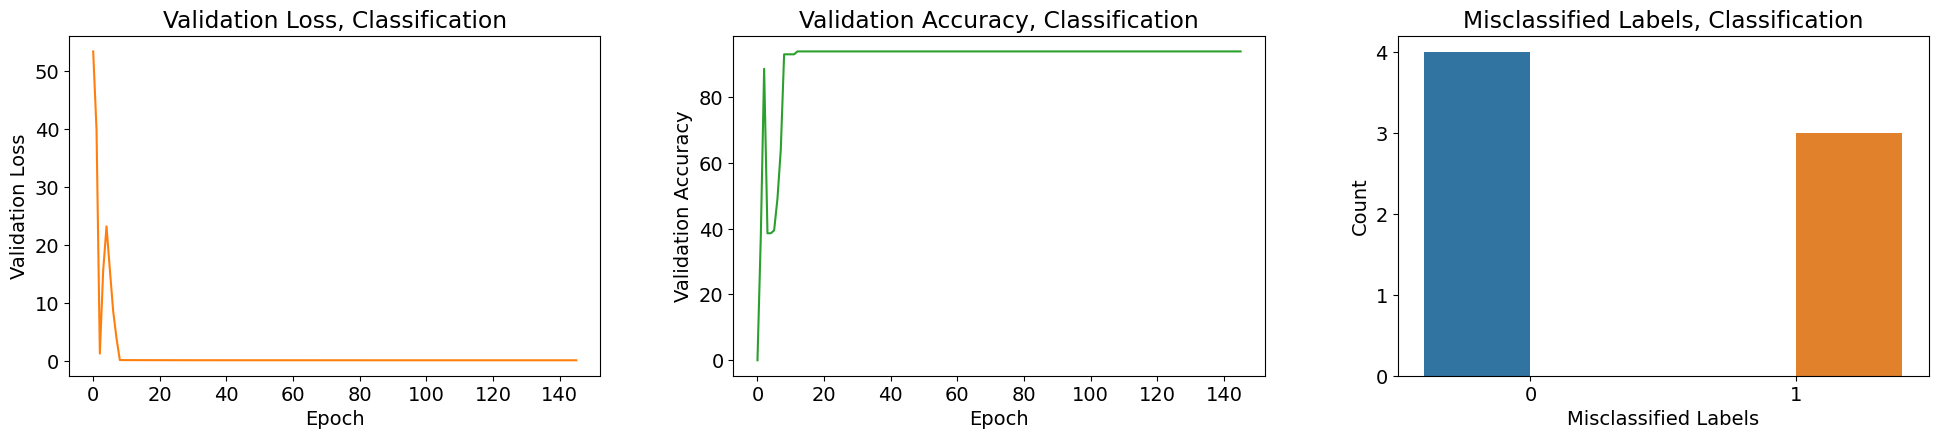

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,4.5))
fig.subplots_adjust(hspace = .2, wspace=.25)

#Second Plot
ax1.plot(val_costs, 'tab:orange')
ax1.set_title("Validation Loss, Classification")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Loss')

#Third Plot
ax2.plot(range(epoch+1), np.array(Val_accuracy), 'tab:green' )
ax2.set_title("Validation Accuracy, Classification")
ax2.set_ylabel('Validation Accuracy')
ax2.set_xlabel('Epoch')

#Fourth Plot
ax3 = sns.countplot(y_test[y_test!=y_pred_test], hue=y_test[y_test!=y_pred_test])
ax3.set_title("Misclassified Labels, Classification")
ax3.set_xlabel('Misclassified Labels')
ax3.set_ylabel('Count')
ax3.get_legend().remove()
plt.show()

There is another way to evaluate the model which is by calculating TPR and FPR:-

1. True Positive Rate (TPR), also known as Sensitivity or Recall, measures a model's ability to correctly identify positive cases,
2. False Positive Rate (FPR) quantifies how often the model incorrectly labels negative cases as positive.
3. These metrics play a crucial role in evaluating binary classification models, particularly when dealing with imbalanced datasets.

In [61]:
def evaluate(y, y_preds):  
    from sklearn.metrics import confusion_matrix
    cf = confusion_matrix(y_test, y_preds)
    TP = cf[0][0]
    FP = cf[0][1]
    FN = cf[1][0]
    TN = cf[1][1]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    return TPR, FPR

In [62]:
results = evaluate(y_test, y_pred_test)
print(f"True Positive Rate : {round(results[0],4)}, False Positive Rate :{round(results[1],4)}")

True Positive Rate : 0.9286, False Positive Rate :0.0556


An ideal case is a TPR equal to 1 and an FPR equal to 0.

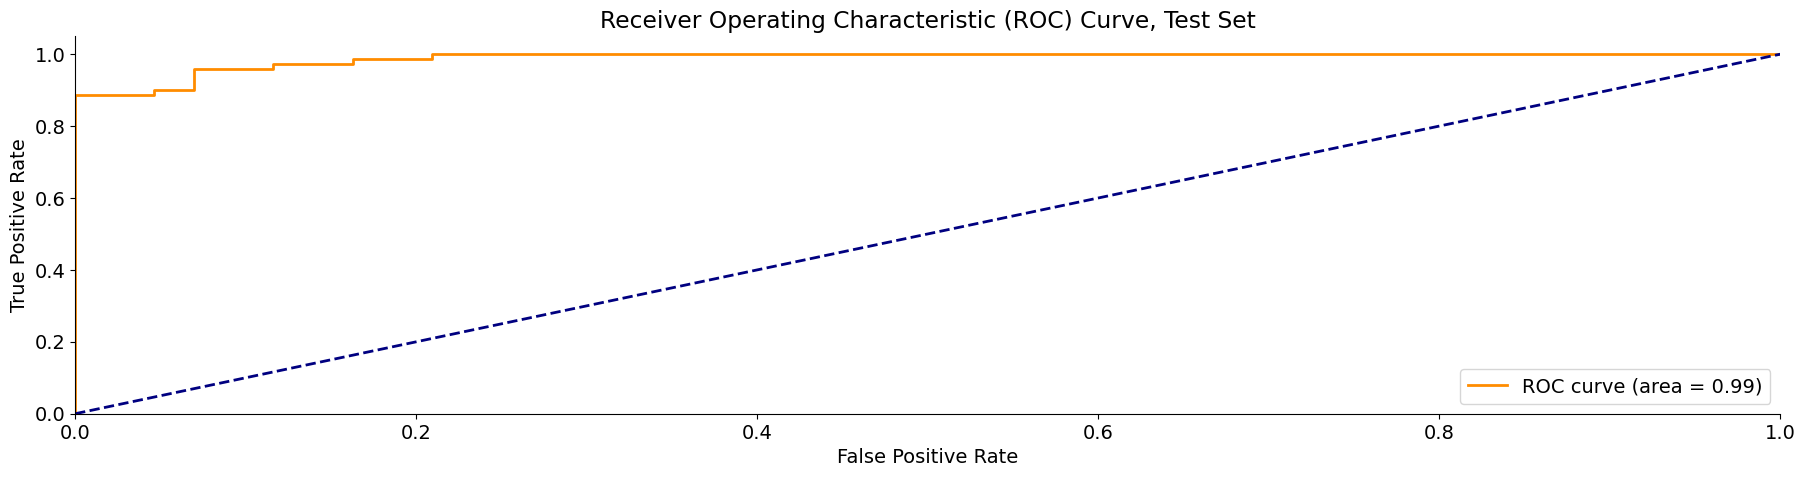

In [63]:
y_preds_prob = sigmoid(b, w , X_test)

##You can play with the threshold which we have picked here to be 0.5
y_preds = (y_preds_prob > 0.5).astype(int)

TPR, FPR = evaluate(y_test, y_preds)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Test Set')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);
plt.legend(loc="lower right")
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Conclusion
    
</h2>
</div>
    
</center>

- Gradient descent stands as a fundamental optimization technique applicable to a wide array of machine learning algorithms. Its simplicity and versatility make it a cornerstone of optimization in machine learning.
  
- Notably, gradient descent's computational efficiency extends across varying dimensional spaces, ensuring its applicability to diverse problem domains. This efficiency allows it to traverse complex landscapes efficiently.

- With meticulous data preprocessing and well-informed hyperparameter tuning, gradient descent is poised to converge towards global minima in fewer iterations. The right setup and fine-tuning amplify its capability to pinpoint optimal parameter values effectively.

I appreciate your time and effort in reviewing the notebook! Your engagement and upvotes aids in refining and advancing our understanding of these intricate machine learning concepts.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Further Reading
    
</h2>
</div>
    
</center>

1. Logistic Regression Using Gradient Descent https://bit.ly/3UGv1JL
2. Linear Regression Using Gradient Descent https://bit.ly/2OwHopq
3. Curse Of Dimensionality https://bit.ly/3RerRtZ
4. Gradient Descent - Deep Dive https://bit.ly/3xR8rog
5. Neural Network From Scratch - https://bit.ly/gradientdescent1